# loading data 

In [85]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [86]:
block_1_data = pd.read_excel('data/block 1.xlsx')

In [87]:
block_1_data.head()

Datetime         GHI         GTI      power
0  2020-05-18 09:30:00  410.721333  423.892000  26.273333
1  2020-05-18 09:45:00  378.227333  392.926667  24.150000
2  2020-05-18 10:00:00  187.194667  459.738667  28.114667
3  2020-05-18 10:15:00  359.333333  662.990667  38.754667
4  2020-05-18 10:30:00  675.728667  688.396000  40.138000

# building the usefull data frame 

In [88]:
block_1_data['Datetime'] = pd.to_datetime(block_1_data['Datetime'],format = '%Y-%m-%d %H:%M:%S', errors='coerce')
block_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28139 entries, 0 to 28138
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  28139 non-null  datetime64[ns]
 1   GHI       28139 non-null  float64       
 2   GTI       28139 non-null  float64       
 3   power     28139 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 879.5 KB


In [89]:
# Converting the datetime into usefull feature
block_1_data['hour'] = block_1_data['Datetime'].dt.hour
block_1_data['minute'] = block_1_data['Datetime'].dt.minute
block_1_data['day'] = block_1_data['Datetime'].dt.day
block_1_data['month'] = block_1_data['Datetime'].dt.month

block_1_data['time_in_float'] = (block_1_data['hour']) + (block_1_data['minute']/60)

block_1_data.head(1)

Datetime         GHI      GTI      power  hour  minute  day  \
0 2020-05-18 09:30:00  410.721333  423.892  26.273333     9      30   18   

   month  time_in_float  
0      5            9.5

# Data visualization, identifying the abnormal condition

**GTI vs GHI ideally it should be directly proportinal.

<AxesSubplot:xlabel='GHI', ylabel='GTI'>

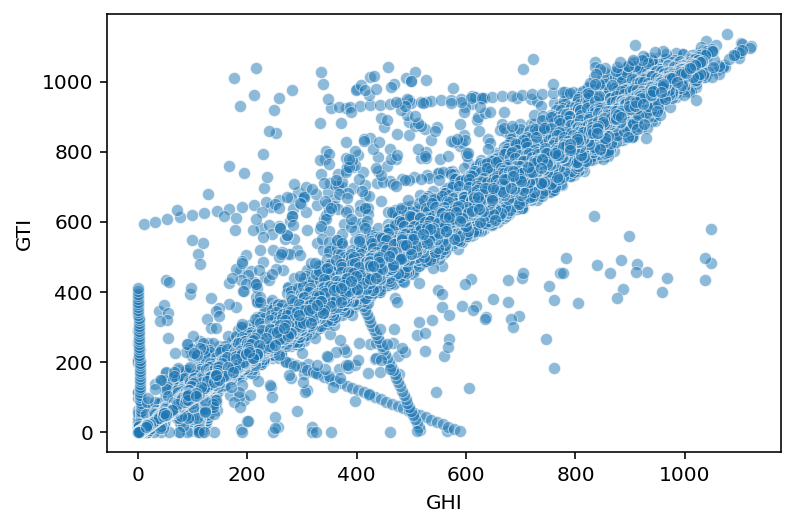

In [90]:
plt.figure(figsize=(6,4),dpi=145)
sns.scatterplot(data=block_1_data,x='GHI',y='GTI',alpha=0.5)

**Power vs GHI, as GHI is one of the main element on which generation of power is dependent and GHI is directly proportional to power.

<AxesSubplot:xlabel='GHI', ylabel='power'>

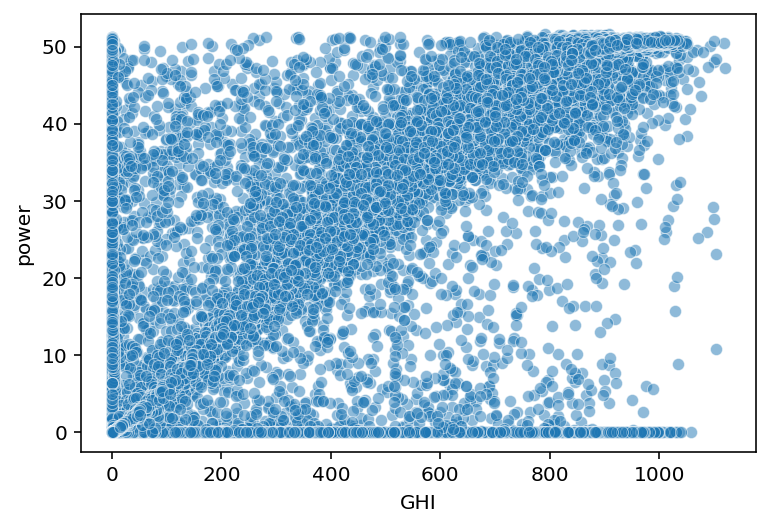

In [91]:
plt.figure(figsize=(6,4),dpi=145)
sns.scatterplot(data=block_1_data,x='GHI',y='power',alpha=0.5)


**GHI(Global Horizontal Irradiance) and GTI(Global Tilted Irradiance) has difference of angle of irradiation.
So Power and GTI is also directly proportional. 

<AxesSubplot:xlabel='GTI', ylabel='power'>

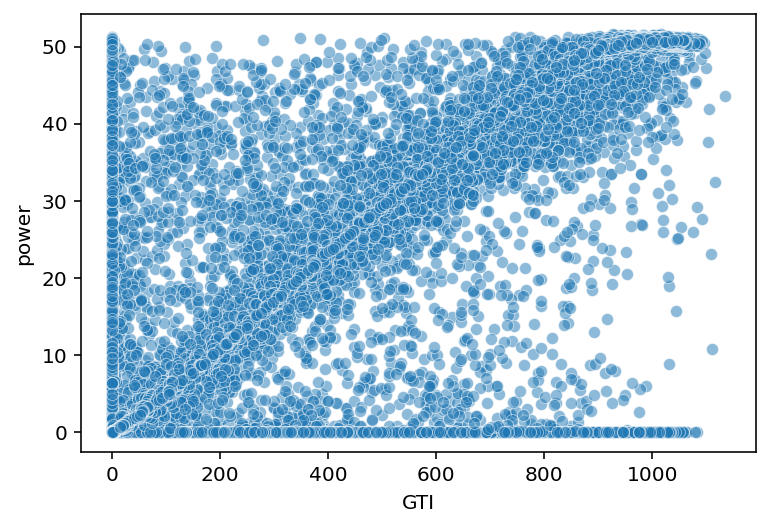

In [92]:
plt.figure(figsize=(6,4),dpi=145)
sns.scatterplot(data=block_1_data,x='GTI',y='power',alpha=0.5)

**Power generation dependent on solar irradiation and irradiation varies with time of day as the sun moves.
Ideally with clear sky and good operating conditions the generation should be "Bell Curve" with respect to time

<AxesSubplot:xlabel='time_in_float', ylabel='power'>

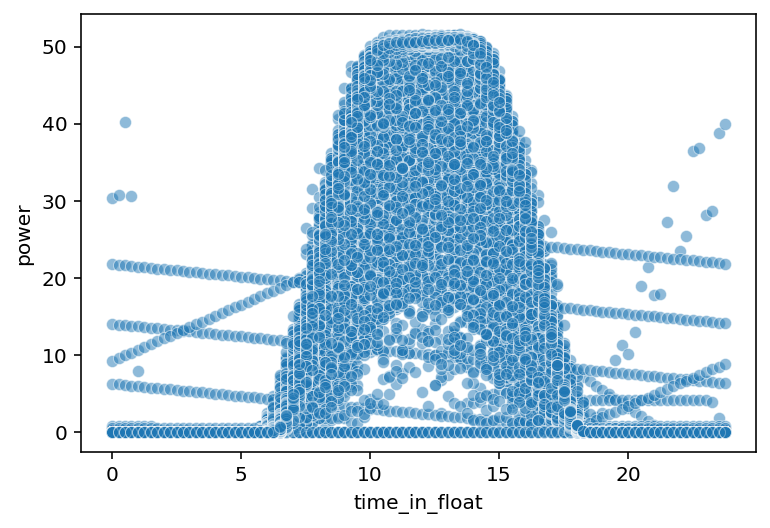

In [93]:
plt.figure(figsize=(6,4),dpi=145)
sns.scatterplot(data=block_1_data,x='time_in_float',y='power',alpha=0.5) # used to see where are the wrong values of GHI and GTI

**Some abnormal cases mostly due to technical issues where GTI is to high but Power is less then what it should be or vice versa.

<AxesSubplot:xlabel='GTI', ylabel='power'>

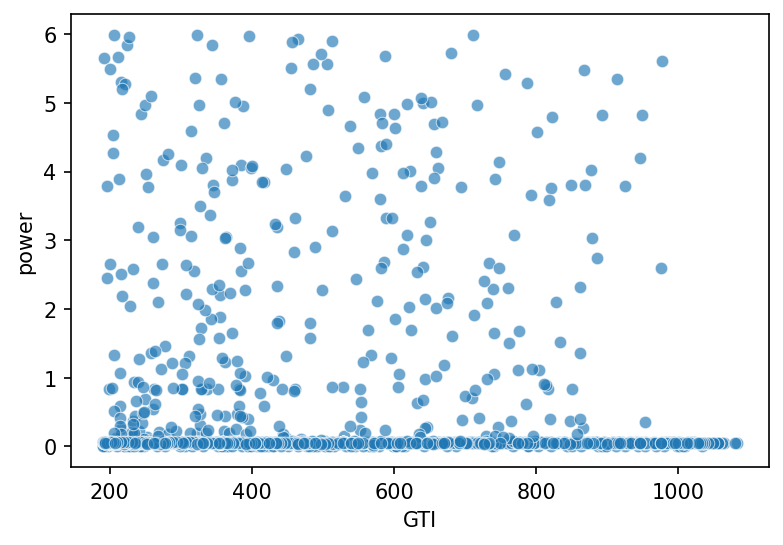

In [94]:
# power vs GTI
abnormal_con_1 = block_1_data[(block_1_data['power']<6) & (block_1_data['GTI']>190)]
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_con_1,x='GTI',y='power',alpha=0.65)

****Some abnormal cases mostly due to technical issues where Power is to high for the value of GHI

<AxesSubplot:xlabel='GHI', ylabel='power'>

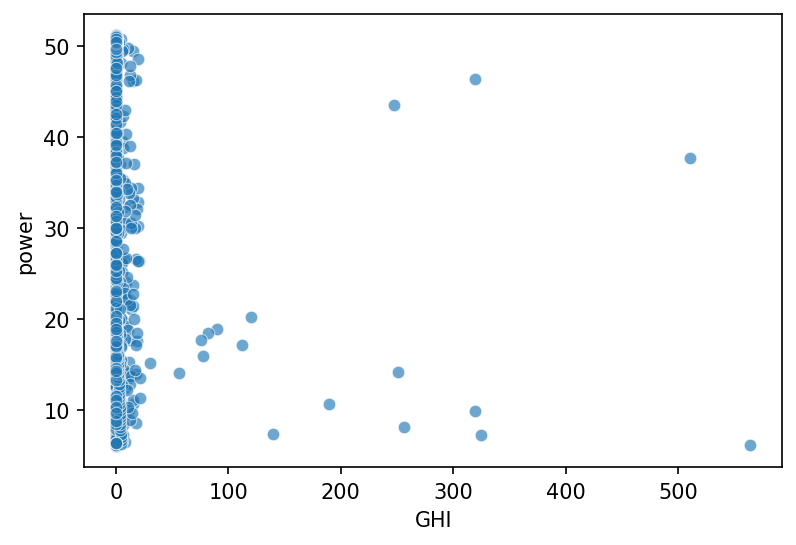

In [95]:
#  power vs GHI
abnormal_con_2 = block_1_data[(block_1_data['power']>6) & ((block_1_data['GTI']<20) | (block_1_data['GHI']<20))]
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_con_2,x='GHI',y='power',alpha=0.65)


<AxesSubplot:xlabel='GHI', ylabel='GTI'>

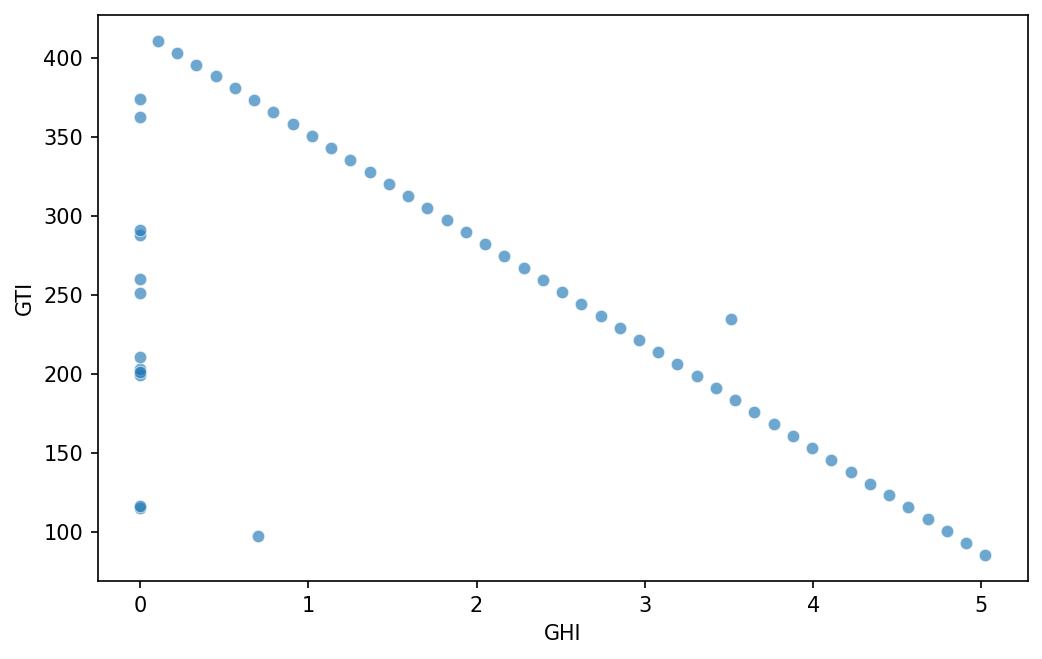

In [96]:
#
abnormal_con_3 = block_1_data[(block_1_data['GTI']>80) & (block_1_data['GHI']<10)]
plt.figure(figsize=(8,5),dpi=150)
sns.scatterplot(data=abnormal_con_3,x='GHI',y='GTI',alpha=0.65)


**Most of the time the data points shown below are due to the technical issues or incorrect data from the site etc..
it should be removed

3144


Text(0, 0.5, 'power')

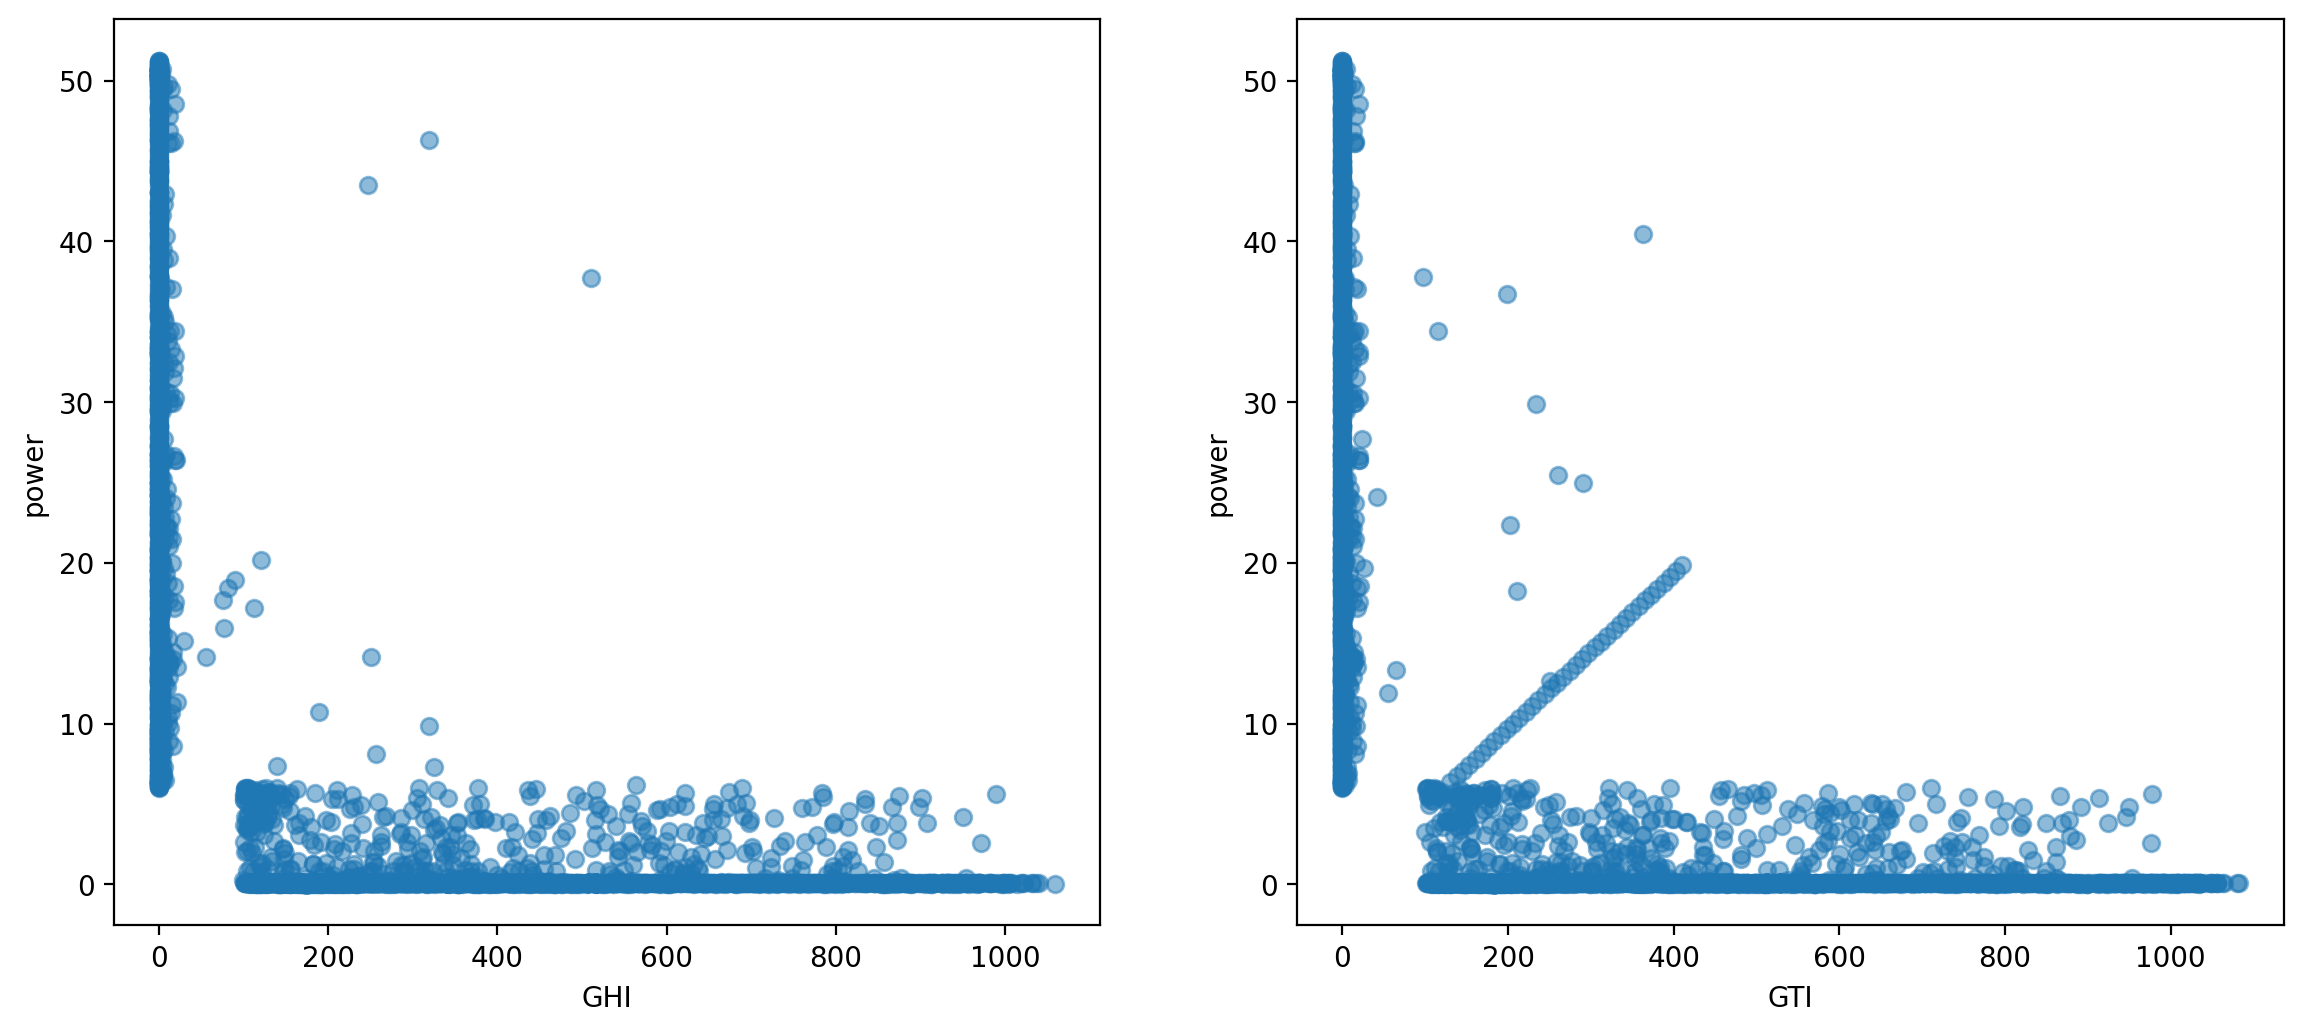

In [97]:
#
abnormal_con_4 = block_1_data[((block_1_data['power']<6) & (block_1_data['GHI']>100) & (block_1_data['GTI']>100)) | ((block_1_data['power']>6) & (block_1_data['GTI']<20)) | ((block_1_data['power']>6) & (block_1_data['GHI']<20))]
print(len(abnormal_con_4))
abnormal_con_4_fig, abnormal_con_4_axes = plt.subplots(nrows=1,ncols=2,figsize=(14,6),dpi=200)
abnormal_con_4_axes[0].scatter(abnormal_con_4['GHI'],abnormal_con_4['power'],alpha=0.5)
abnormal_con_4_axes[0].set_xlabel('GHI')
abnormal_con_4_axes[0].set_ylabel('power')
abnormal_con_4_axes[1].scatter(abnormal_con_4['GTI'],abnormal_con_4['power'],alpha=0.5)
abnormal_con_4_axes[1].set_xlabel('GTI')
abnormal_con_4_axes[1].set_ylabel('power')


# plt.figure(figsize=(8,5),dpi=150)
# sns.scatterplot(data=abnormal_con_4,x='GHI',y='power',alpha=0.65,hue='GTI')

# print(len(index_incorr_4)+len(index_incorr_5)+len(index_incorr_6)+len(index_incorr_7))




# Data cleaning  removing abnormal data

# Various abnormal conditionals identified and removed in the following.

In [98]:
block_1_df = block_1_data[['month','day','time_in_float','GHI','GTI','power']]

print(len(block_1_data),len(block_1_df))
block_1_df.head()

28139 28139


month  day  time_in_float         GHI         GTI      power
0      5   18           9.50  410.721333  423.892000  26.273333
1      5   18           9.75  378.227333  392.926667  24.150000
2      5   18          10.00  187.194667  459.738667  28.114667
3      5   18          10.25  359.333333  662.990667  38.754667
4      5   18          10.50  675.728667  688.396000  40.138000

In [99]:
single_day_1 = block_1_df[4000:4026]
# single_day_1.to_excel('single_day_file.xlsx')
single_day_1

month  day  time_in_float         GHI         GTI      power
4000      6   29           1.50  879.749333  885.225333   0.060000
4001      6   29           1.75  708.568667  710.800667   0.060000
4002      6   29           2.00  804.525333  800.328667   0.060000
4003      6   29           2.25  883.628000  884.828000   0.060000
4004      6   29           2.50  934.750000  941.515333   0.060000
4005      6   29           2.75  707.235333  722.540667   0.060000
4006      6   29           3.00  590.835333  605.530000   0.060000
4007      6   29           3.25  583.782000  596.700667   0.060000
4008      6   29           3.50  399.928667  411.970000   0.060000
4009      6   29           3.75  227.330000  238.084667   0.060000
4010      6   29           4.00  189.722667  200.560667   0.060000
4011      6   29           4.25  237.926667  249.975333   0.060000
4012      6   29           4.50  404.794667  413.820000   0.060000
4013      6   29           4.75  575.964000  582.730667   0.060000
4014      6   29           5.00  546.917333  555.609333   0.060000
4015      6   29           5.25  512.748000  524.620000   0.055333
4016      6   29           5.50  495.099333  510.198000   0.050000
4017      6   29           5.75  310.580667  322.706667   0.194667
4018      6   29           6.00  193.916667  202.534000   0.854667
4019      6   29           6.25  147.007333  154.267333   2.255333
4020      6   29           6.50  128.918000  134.779333   4.199333
4021      6   29           6.75  113.704000  118.550667   6.622667
4022      6   29           7.00   63.780667   66.799333   8.748667
4023      6   29           7.25   21.542000   22.502667  10.395333
4024      6   29           7.50    4.988667    5.074000  12.974667
4025      6   29           7.75    0.197333    0.154667  14.852000

## Identifiying the abnormal data  Power vs Time

In [100]:
# index_linear = block_1_data[((block_1_data['time_in_float']>0) & (block_1_data['time_in_float']<3)) & ((block_1_data['power']<23) & (block_1_data['power']>20))]
# print(index_linear.head()) --> [8984:9079]
#found line one

# index_linear_1 = block_1_data[((block_1_data['time_in_float']>0) & (block_1_data['time_in_float']<3)) & ((block_1_data['power']<16) & (block_1_data['power']>13))]
# print(index_linear_1.head())  ---> [9080:9176]

# index_linear_2 = block_1_data[((block_1_data['time_in_float']>0) & (block_1_data['time_in_float']<3)) & ((block_1_data['power']<10) & (block_1_data['power']>7.5))]
# print(index_linear_2.head()) ----> [11192:11221]

# index_linear_3 = block_1_data[((block_1_data['time_in_float']>0) & (block_1_data['time_in_float']<3)) & ((block_1_data['power']<9) & (block_1_data['power']>5))]
# print((index_linear_3)) --->  [8923:8985]

# index_linear_4 = block_1_data[((block_1_data['time_in_float']>20) & (block_1_data['time_in_float']<22)) & ((block_1_data['power']<25) & (block_1_data['power']>22))]
# print(index_linear_4.iloc[8948:8968])-----> [8922:8984]

# index_linear_5 = block_1_data[((block_1_data['time_in_float']>21) & (block_1_data['time_in_float']<24)) & ((block_1_data['power']<6) & (block_1_data['power']>2))]
# print(index_linear_5) ----> [2430:2455],


# index_linear_6 = block_1_data[((block_1_data['time_in_float']>20) & (block_1_data['time_in_float']<21)) & ((block_1_data['power']<5) & (block_1_data['power']>2))]
# print(index_linear_6.head())  ---> [765:813]


RangeIndex(start=8984, stop=9176, step=1)
number_of_rows_droped : 192 , block_1_df : 27947


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time_in_float', ylabel='power'>

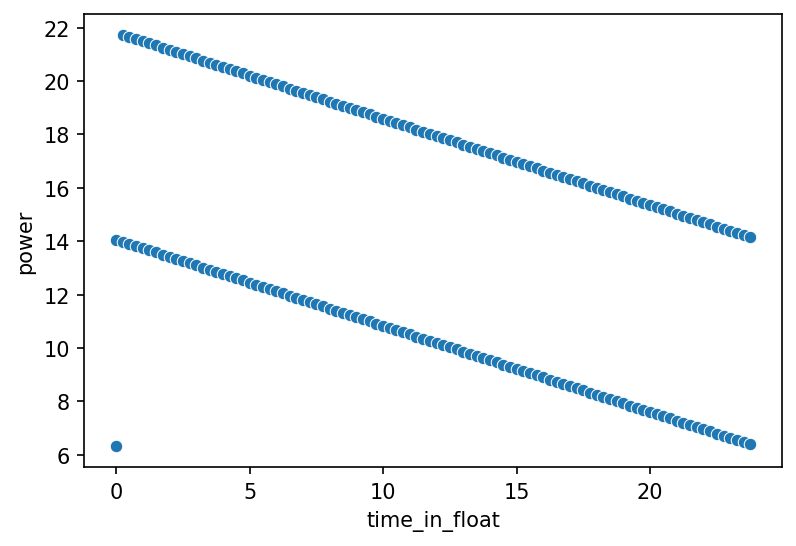

In [101]:
abnormal_con_1 = block_1_df[((block_1_df['time_in_float']>0) & (block_1_df['time_in_float']<3)) & ((block_1_df['power']<23) & (block_1_df['power']>20))]
# two parallel lines are removed i.e 192 blocks

abnormal_con_1_index = (block_1_df.iloc[8984:9176]).index
abnormal_con_1_droped_df = block_1_df.iloc[8984:9176]
print(abnormal_con_1_index)

block_1_df.drop(abnormal_con_1_index,inplace=True)

print(f'number_of_rows_droped : {len(abnormal_con_1_index)} , block_1_df : {len(block_1_df)}')

plt.figure(figsize = (6,4),dpi=150)
sns.scatterplot(data = abnormal_con_1_droped_df, x='time_in_float',y='power')

In [102]:
# recent_df 

In [103]:
# block_1_df = recent_df.copy()

27848 28139


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time_in_float', ylabel='power'>

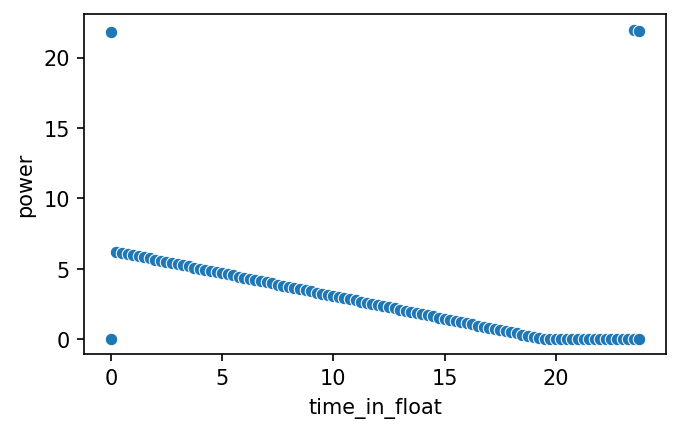

In [104]:
abnormal_con_2 = block_1_df[((block_1_df['time_in_float']>0) & (block_1_df['time_in_float']<3)) & ((block_1_df['power']<16) & (block_1_df['power']>13))]
# print(abnormal_con_2.head())


abnormal_con_2_index_df = (block_1_df.iloc[8981:9080]).index

abnormal_con_2_droped_df = block_1_df.iloc[8981:9080]

# print(abnormal_con_2_index_df)

block_1_df.drop(abnormal_con_2_index_df,inplace=True)

print(len(block_1_df),len(block_1_data))
plt.figure(figsize = (5,3),dpi=150)
sns.scatterplot(data = abnormal_con_2_droped_df, x='time_in_float',y='power')

Int64Index([11192, 11193, 11194, 11195, 11196, 11197, 11198, 11199, 11200,
            11201, 11202, 11203, 11204, 11205, 11206, 11207, 11208, 11209,
            11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218,
            11219, 11220],
           dtype='int64')
number_of_rows_droped : 29 , block_1_df : 27819


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time_in_float', ylabel='power'>

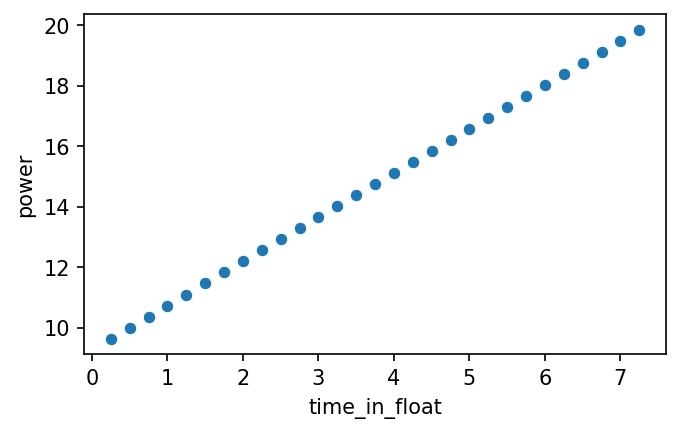

In [105]:
abnormal_con_3 = block_1_df[((block_1_df['time_in_float']>0) & (block_1_df['time_in_float']<5)) & ((block_1_df['power']<15) & (block_1_df['power']>7.5))]

# print(abnormal_con_3)

index = range(11192,11221)

abnormal_con_3_index = (block_1_df.loc[index]).index



print(abnormal_con_3_index)
abnormal_con_3_droped_df = block_1_df.loc[abnormal_con_3_index]
# abnormal_con_3_droped_df = block_1_df.iloc[11384:11479]
# #print(abnormal_con_3_index)

block_1_df.drop(abnormal_con_3_index,inplace=True)


print(f'number_of_rows_droped : {len(abnormal_con_3_index)} , block_1_df : {len(block_1_df)}')

plt.figure(figsize = (5,3),dpi=150)
sns.scatterplot(data = abnormal_con_3_droped_df, x='time_in_float',y='power')

number_of_rows_droped : 58 , block_1_df : 27761


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time_in_float', ylabel='power'>

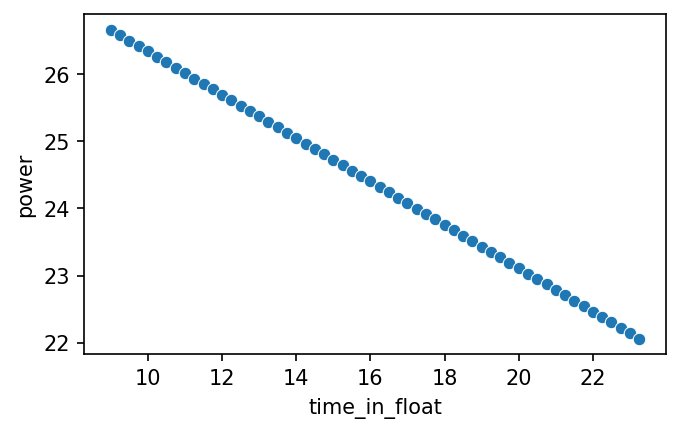

In [106]:
abnormal_con_4 = block_1_df[((block_1_df['time_in_float']>20) & (block_1_df['time_in_float']<22)) & ((block_1_df['power']<25) & (block_1_df['power']>22))]
# print(abnormal_con_4)

# con_4_index = range[]
abnormal_con_4_index = (block_1_df.loc[8923:8980]).index


# print(abnormal_con_4_index)
abnormal_con_4_droped_df = block_1_df.loc[abnormal_con_4_index]

block_1_df.drop(abnormal_con_4_index,inplace=True)

print(f'number_of_rows_droped : {len(abnormal_con_4_index)} , block_1_df : {len(block_1_df)}')


plt.figure(figsize = (5,3),dpi=150)
sns.scatterplot(data = abnormal_con_4_droped_df, x='time_in_float',y='power')

number_of_rows_droped : 25 , block_1_df : 27736


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time_in_float', ylabel='power'>

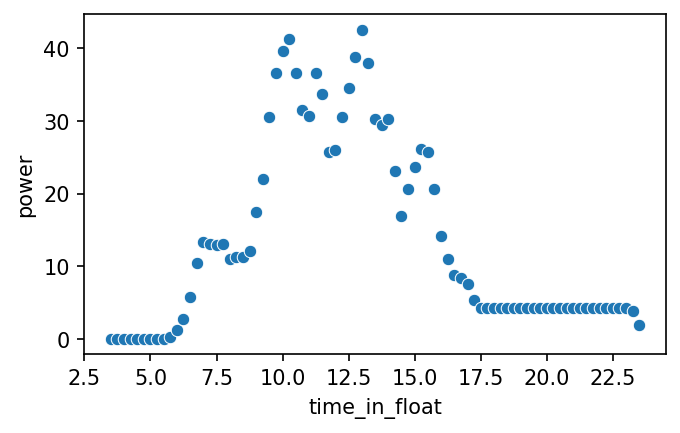

In [107]:
abnormal_con_5 = block_1_df[((block_1_df['time_in_float']>21) & (block_1_df['time_in_float']<24)) & ((block_1_df['power']<6) & (block_1_df['power']>2))]



abnormal_con_5_index = (block_1_df.loc[2432:2456]).index   # location of the abnormal data ,loc[2367:2543] 

abnormal_con_5_droped_df = block_1_df.loc[2376:2456]   # all 96 blocks of that day for ploting

block_1_df.drop(abnormal_con_5_index,inplace=True) ## droping only the abnormal data

print(f'number_of_rows_droped : {len(abnormal_con_5_index)} , block_1_df : {len(block_1_df)}')


plt.figure(figsize = (5,3),dpi=150)
sns.scatterplot(data = abnormal_con_5_droped_df, x='time_in_float',y='power')

number_of_rows_droped : 25 , block_1_df : 27711


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time_in_float', ylabel='power'>

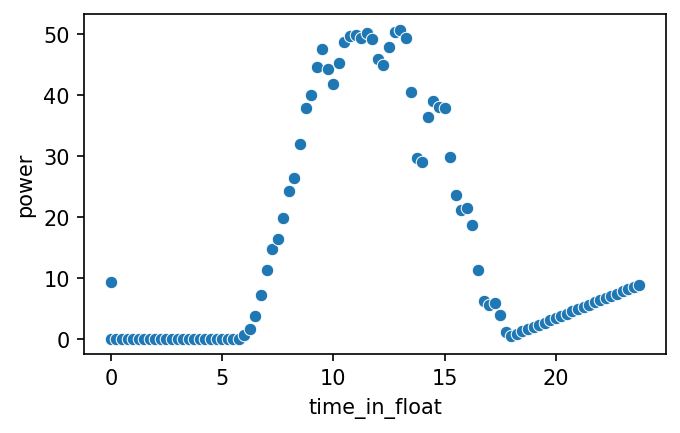

In [108]:
abnormal_con_6 = block_1_df[((block_1_df['time_in_float']>21) & (block_1_df['time_in_float']<24)) & ((block_1_df['power']<6) & (block_1_df['power']>2))]

abnormal_con_6_index = (block_1_df.loc[11167:11191]).index  
abnormal_con_6_droped_df = block_1_df.loc[11095:11191]               # all 96 blocks of that day for ploting

block_1_df.drop(abnormal_con_6_index,inplace=True)                    ## droping only the abnormal data

print(f'number_of_rows_droped : {len(abnormal_con_6_index)} , block_1_df : {len(block_1_df)}')


plt.figure(figsize = (5,3),dpi=150)
sns.scatterplot(data = abnormal_con_6_droped_df, x='time_in_float',y='power')

number_of_rows_droped : 143 , block_1_df : 27568


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time_in_float', ylabel='power'>

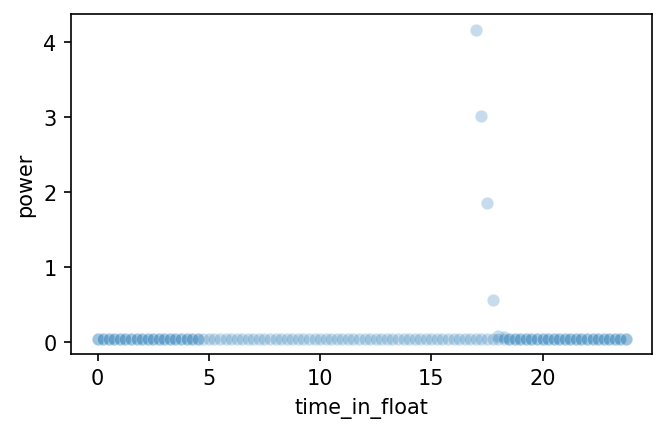

In [109]:

abnormal_con_7_index = (block_1_df.loc[23258:23400]).index  
abnormal_con_7_droped_df = block_1_df.loc[abnormal_con_7_index]       # ploting what is dropped

block_1_df.drop(abnormal_con_7_index,inplace=True)                    ## droping only the abnormal data

print(f'number_of_rows_droped : {len(abnormal_con_7_index)} , block_1_df : {len(block_1_df)}')


plt.figure(figsize = (5,3),dpi=150)
sns.scatterplot(data = abnormal_con_7_droped_df, x='time_in_float',y='power',alpha=0.25)

number_of_rows_droped : 49 , block_1_df : 27519


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time_in_float', ylabel='power'>

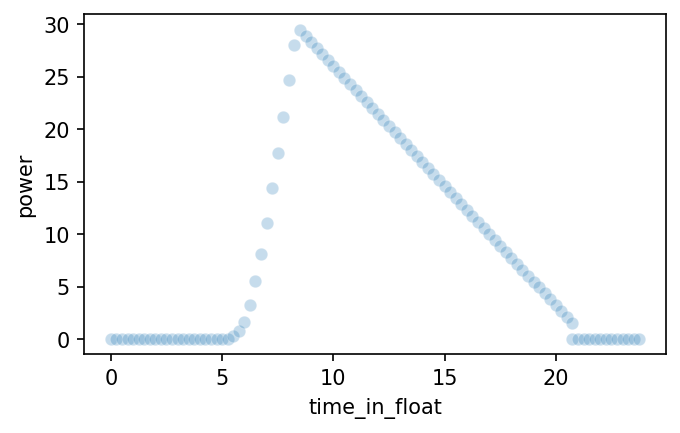

In [110]:
index_linear_6 = block_1_data[((block_1_data['time_in_float']>20) & (block_1_data['time_in_float']<21)) & ((block_1_data['power']<5) & (block_1_data['power']>2))]
# print(index_linear_6.head())  ---> [765:813]

abnormal_con_8_index = (block_1_df.loc[765:813]).index  
abnormal_con_8_droped_df = block_1_df.loc[717:813]                    # 96 blocks from which rows are dropped

block_1_df.drop(abnormal_con_8_index,inplace=True)                    ## droping only the abnormal data

print(f'number_of_rows_droped : {len(abnormal_con_8_index)} , block_1_df : {len(block_1_df)}')


plt.figure(figsize = (5,3),dpi=150)
sns.scatterplot(data = abnormal_con_8_droped_df, x='time_in_float',y='power',alpha=0.25)

number_of_rows_droped : 253 , block_1_df : 27266


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time_in_float', ylabel='power'>

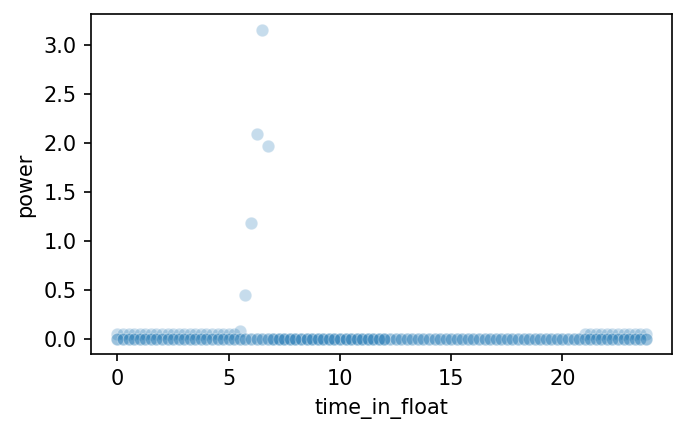

In [111]:

abnormal_con_9_index = (block_1_df.loc[1390:1642]).index  
abnormal_con_9_droped_df = block_1_df.loc[abnormal_con_9_index]                    # df of dropped rows

block_1_df.drop(abnormal_con_9_index,inplace=True)                    ## droping only the abnormal data

print(f'number_of_rows_droped : {len(abnormal_con_9_index)} , block_1_df : {len(block_1_df)}')


plt.figure(figsize = (5,3),dpi=150)
sns.scatterplot(data = abnormal_con_9_droped_df, x='time_in_float',y='power',alpha=0.25)

number_of_rows_droped : 19 , block_1_df : 27247


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time_in_float', ylabel='power'>

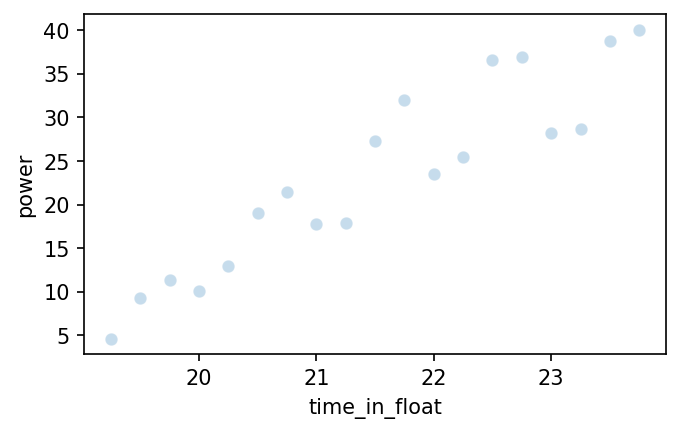

In [112]:
abnormal_con_10 = block_1_df[(block_1_df['time_in_float']>19.2) & (block_1_df['power']>4)]

abnormal_con_10_index = abnormal_con_10.index

abnormal_con_10_droped_df = block_1_df.loc[abnormal_con_10_index]

block_1_df.drop(abnormal_con_10_index,inplace=True)

print(f'number_of_rows_droped : {len(abnormal_con_10_index)} , block_1_df : {len(block_1_df)}')

plt.figure(figsize = (5,3),dpi=150)
sns.scatterplot(data = abnormal_con_10_droped_df, x='time_in_float',y='power',alpha=0.25)

In [113]:
abnormal_con_11 = block_1_df[(block_1_df['time_in_float']<2) & (block_1_df['power']>5)]

abnormal_con_11_index = abnormal_con_11.index

abnormal_con_11_droped_df = block_1_df.loc[abnormal_con_11_index]

block_1_df.drop(abnormal_con_11_index,inplace=True)

print(f'number_of_rows_droped : {len(abnormal_con_11_index)} , block_1_df : {len(block_1_df)}')


number_of_rows_droped : 5 , block_1_df : 27242


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


27242 28139


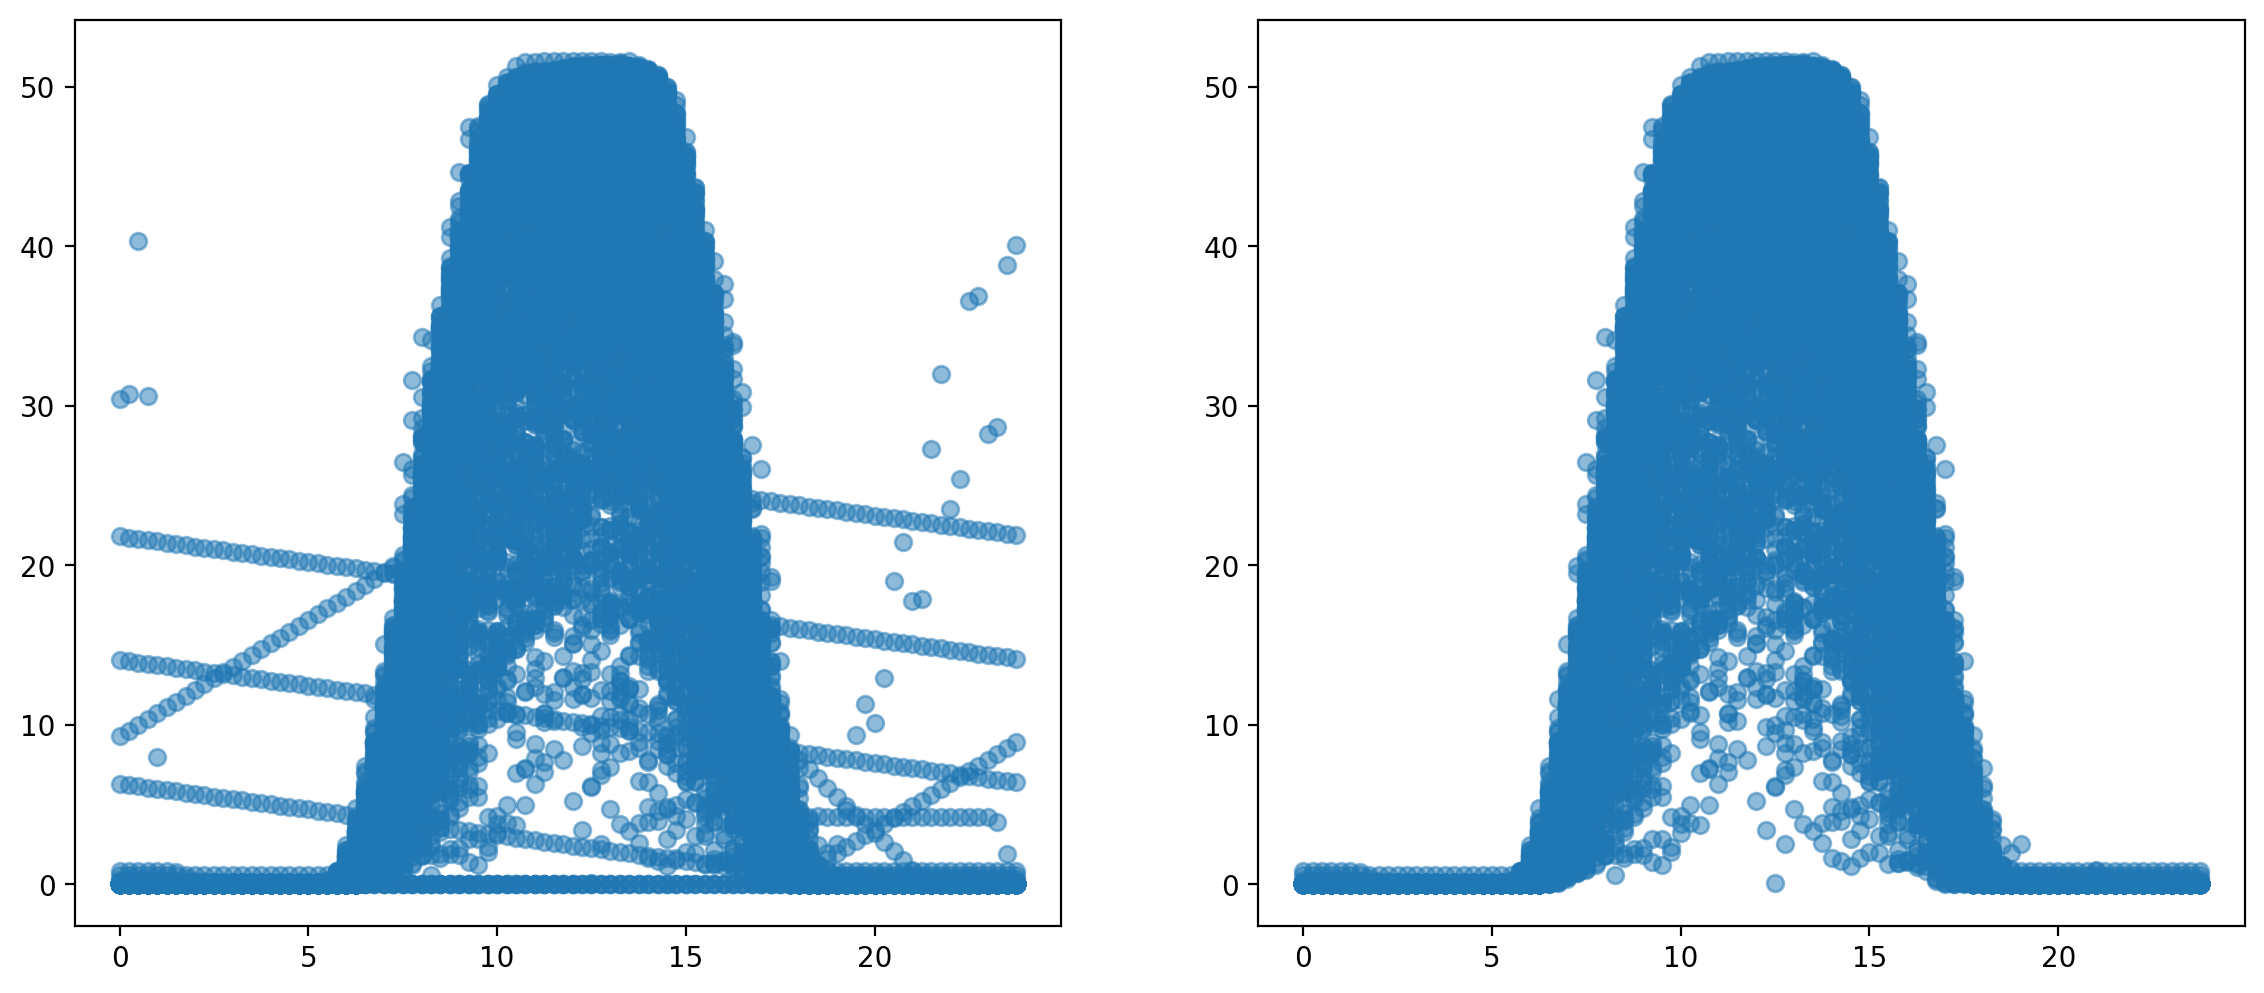

In [114]:

checking_chan_fig_1, checking_chan_axes_1 = plt.subplots(nrows=1,ncols=2,figsize=(14,6),dpi=200)
checking_chan_axes_1[0].scatter(block_1_data['time_in_float'],block_1_data['power'],alpha=0.5)

checking_chan_axes_1[1].scatter(block_1_df['time_in_float'],block_1_df['power'],alpha=0.5)
print(len(block_1_df),len(block_1_data))



# Power vs GTI data cleaning

**Identifying and removing the abnormal data entries with respective to Power vs GTI and plotting the normal data entries.

In [115]:
block_1_df_Pgt = block_1_df.copy()

388


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='GTI', ylabel='power'>

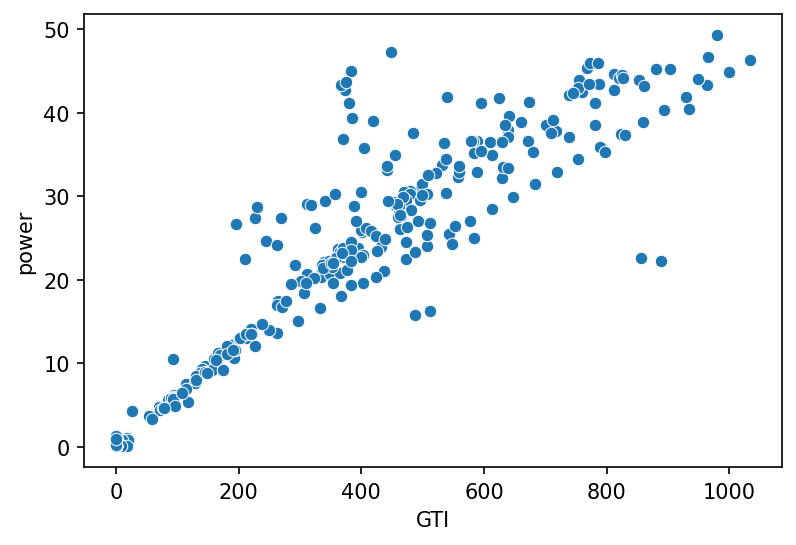

In [116]:
abnormal_pg_1 = block_1_df_Pgt.iloc[2000:3000]

pg_filtering_1 = abnormal_pg_1[((abnormal_pg_1['power']>2) & (abnormal_pg_1['GTI']<20)) | 
                               ((abnormal_pg_1['power']>33) & (abnormal_pg_1['GTI']<360)) | 
                               ((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |
                              ((abnormal_pg_1['power']<3) & (abnormal_pg_1['GTI']>20)) |
                               ((abnormal_pg_1['power']<21) & (abnormal_pg_1['GTI']>520))| 
                               ((abnormal_pg_1['power']<12) & (abnormal_pg_1['GTI']>400))].index

abnormal_pg_1.drop(pg_filtering_1,inplace = True)
block_1_df_Pgt.drop(pg_filtering_1,inplace = True)

print(len(pg_filtering_1))

plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_1,x='GTI',y='power')


447


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='GTI', ylabel='power'>

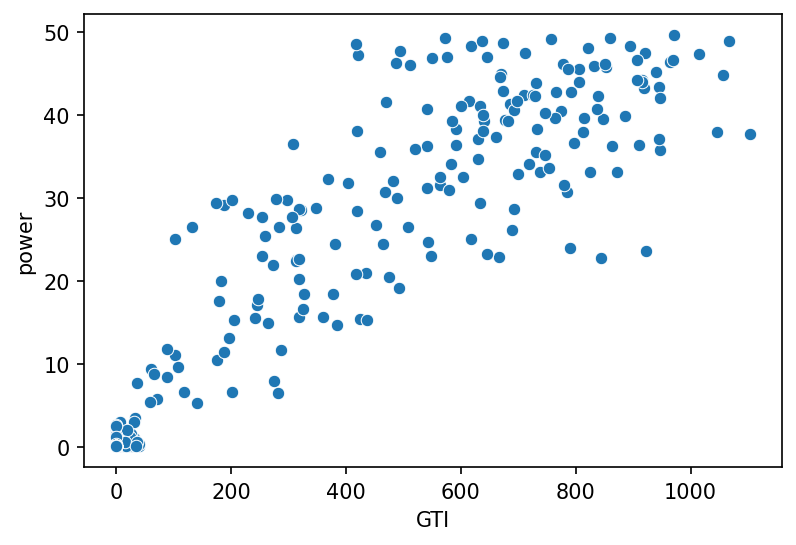

In [117]:
abnormal_pg_2 = block_1_df_Pgt.iloc[2612:3500]

pg_filtering_2 = abnormal_pg_2[((abnormal_pg_2['power']>3) & (abnormal_pg_2['GTI']<25)) | 
                               ((abnormal_pg_2['power']>30) & (abnormal_pg_2['GTI']<300)) | 
                               ((abnormal_pg_2['power']>15) & (abnormal_pg_2['GTI']<100)) |
                               
                              ((abnormal_pg_2['power']<5) & (abnormal_pg_2['GTI']>40)) |
                               ((abnormal_pg_2['power']<22) & (abnormal_pg_2['GTI']>520))|
                              ((abnormal_pg_2['power']<13) & (abnormal_pg_2['GTI']>320))].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_2.drop(pg_filtering_2,inplace = True)
block_1_df_Pgt.drop(pg_filtering_2,inplace = True)

print(len(pg_filtering_2))

plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_2,x='GTI',y='power')


723
1000


<AxesSubplot:xlabel='GTI', ylabel='power'>

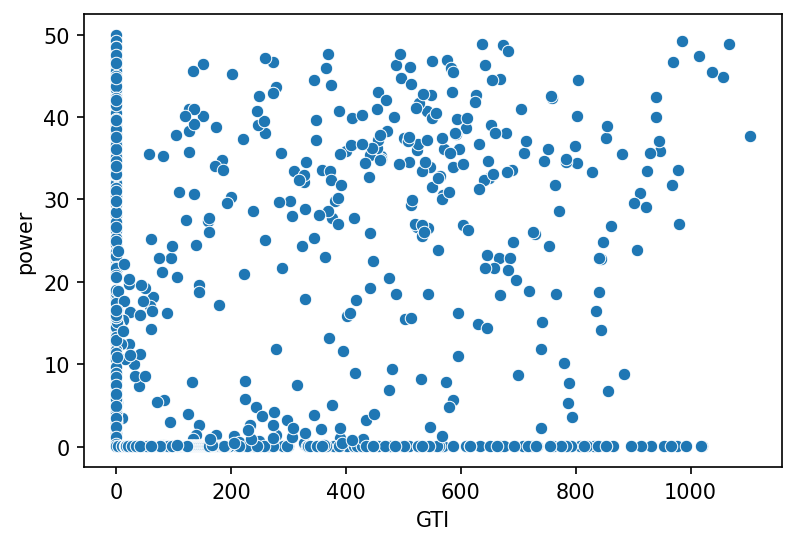

In [118]:
abnormal_pg_4 = block_1_df_Pgt.iloc[3023:4023]

pg_filtering_4 = abnormal_pg_4[((abnormal_pg_4['power']>6.5) & (abnormal_pg_4['GTI']<180)) | 
                               ((abnormal_pg_4['power']>36) & (abnormal_pg_4['GTI']<400)) |
                               ((abnormal_pg_4['power']>1) & (abnormal_pg_4['GTI']<20)) |
                               ((abnormal_pg_4['power']>25) & (abnormal_pg_4['GTI']<310)) |
                               
                              ((abnormal_pg_4['power']<5) & (abnormal_pg_4['GTI']>120)) |
                               ((abnormal_pg_4['power']<12) & (abnormal_pg_4['GTI']>310)) |
                               ((abnormal_pg_4['power']<1) & (abnormal_pg_4['GTI']>20)) |
                               ((abnormal_pg_4['power']<24) & (abnormal_pg_4['GTI']>550)) ].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

# abnormal_pg_4.drop(pg_filtering_4,inplace = True)
# block_1_df_Pgt.drop(pg_filtering_4,inplace = True)

print(len(pg_filtering_4))
print(len(abnormal_pg_4))

plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_4,x='GTI',y='power')

711


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='GTI', ylabel='power'>

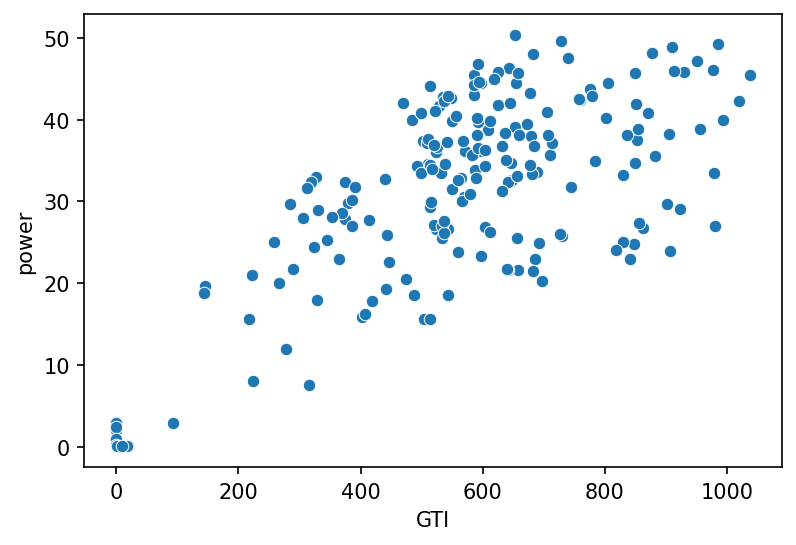

In [119]:
abnormal_pg_3 = block_1_df_Pgt.iloc[3300:4300]

pg_filtering_3 = abnormal_pg_3[((abnormal_pg_3['power']>3) & (abnormal_pg_3['GTI']<130)) | 
                               ((abnormal_pg_3['power']>33) & (abnormal_pg_3['GTI']<470)) | 
                            ((abnormal_pg_3['power']>30) & (abnormal_pg_3['GTI']<240)) | 
                               ((abnormal_pg_3['power']>20) & (abnormal_pg_3['GTI']<210)) | 
                               
                              ((abnormal_pg_3['power']<7) & (abnormal_pg_3['GTI']>100)) |
                               ((abnormal_pg_3['power']<2) & (abnormal_pg_3['GTI']>20)) |
                               ((abnormal_pg_3['power']<14) & (abnormal_pg_3['GTI']>350)) |
                               ((abnormal_pg_3['power']<20) & (abnormal_pg_3['GTI']>580))].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_3.drop(pg_filtering_3,inplace = True)
block_1_df_Pgt.drop(pg_filtering_3,inplace = True)

print(len(pg_filtering_3))

plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_3,x='GTI',y='power')


670


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='GTI', ylabel='power'>

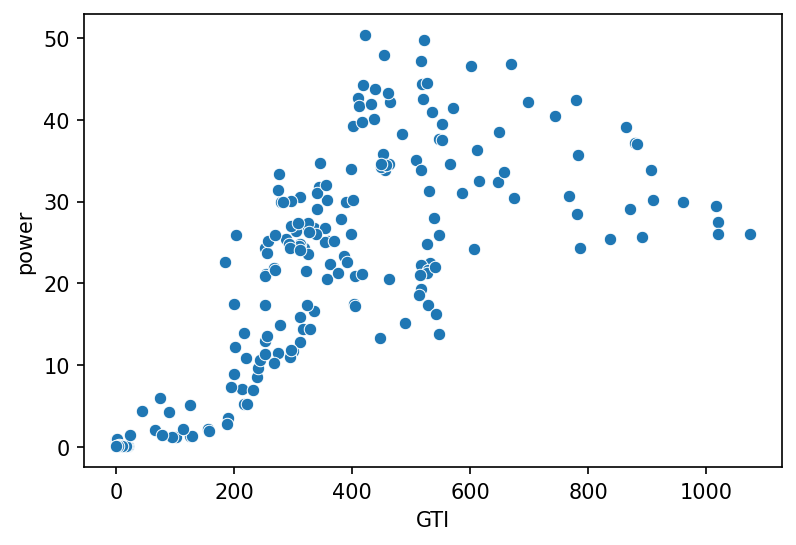

In [120]:
abnormal_pg_5 = block_1_df_Pgt.iloc[3654:4654]

pg_filtering_5 = abnormal_pg_5[((abnormal_pg_5['power']>6.5) & (abnormal_pg_5['GTI']<180)) | 
                               ((abnormal_pg_5['power']>36) & (abnormal_pg_5['GTI']<400)) |
                               ((abnormal_pg_5['power']>1) & (abnormal_pg_5['GTI']<20)) |
                               ((abnormal_pg_5['power']>27) & (abnormal_pg_5['GTI']<270)) |
                               
                               ((abnormal_pg_5['power']<12) & (abnormal_pg_5['GTI']>310)) |
                               ((abnormal_pg_5['power']<5) & (abnormal_pg_5['GTI']>190)) |
                               ((abnormal_pg_5['power']<1) & (abnormal_pg_5['GTI']>20)) |
                               ((abnormal_pg_5['power']<24) & (abnormal_pg_5['GTI']>550)) ].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_5.drop(pg_filtering_5,inplace = True)
block_1_df_Pgt.drop(pg_filtering_5,inplace = True)

print(len(pg_filtering_5))


plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_5,x='GTI',y='power')

655


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='GTI', ylabel='power'>

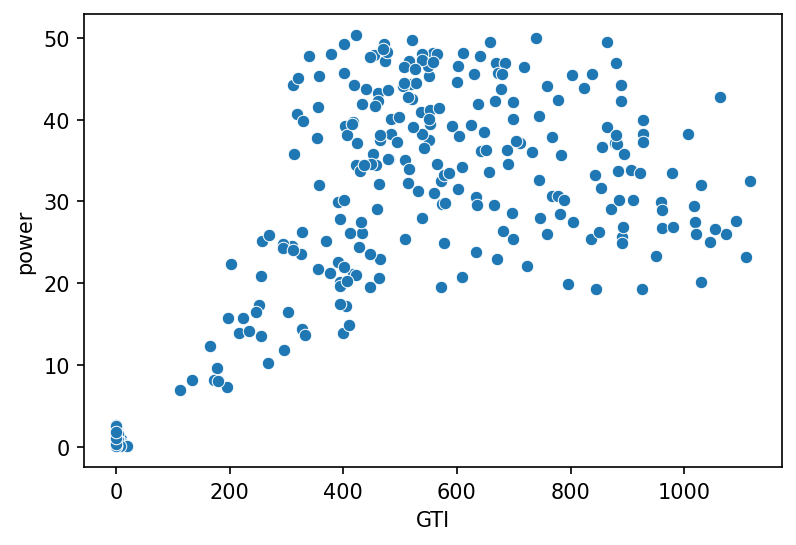

In [121]:
abnormal_pg_6 = block_1_df_Pgt.iloc[3882:4882]

pg_filtering_6 = abnormal_pg_6[((abnormal_pg_6['power']>3) & (abnormal_pg_6['GTI']<80)) | 
                               ((abnormal_pg_6['power']>26) & (abnormal_pg_6['GTI']<310)) |
                                ((abnormal_pg_6['power']>15) & (abnormal_pg_6['GTI']<190)) |
                               
                               ((abnormal_pg_6['power']<5) & (abnormal_pg_6['GTI']>20)) |
                               ((abnormal_pg_6['power']<13) & (abnormal_pg_6['GTI']>300)) |
                               ((abnormal_pg_6['power']<19) & (abnormal_pg_6['GTI']>420)) ].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_6.drop(pg_filtering_6,inplace = True)
block_1_df_Pgt.drop(pg_filtering_6,inplace = True)

print(len(pg_filtering_6))


plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_6,x='GTI',y='power')

C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


634


<AxesSubplot:xlabel='GTI', ylabel='power'>

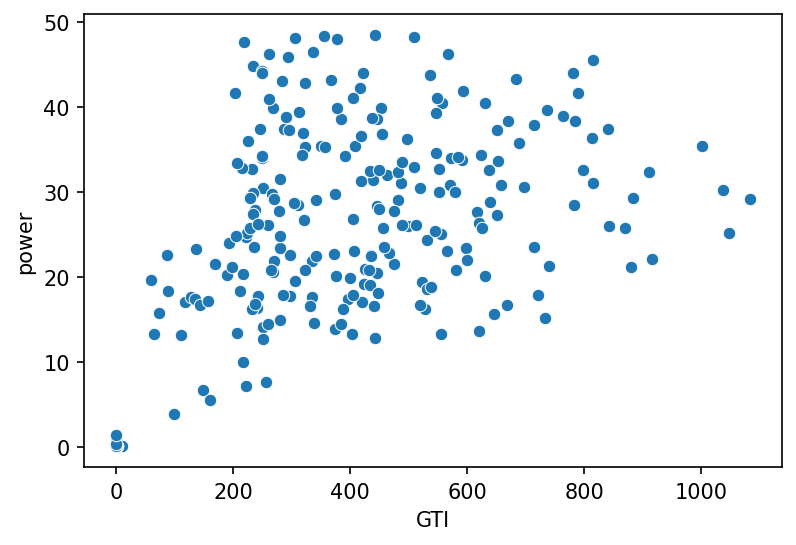

In [122]:
abnormal_pg_7 = block_1_df_Pgt.iloc[4260:5260]

pg_filtering_7 = abnormal_pg_7[((abnormal_pg_7['power']>4.5) & (abnormal_pg_7['GTI']<60)) | 
                               ((abnormal_pg_7['power']>25) & (abnormal_pg_7['GTI']<200)) |
                               ((abnormal_pg_7['power']>1.5) & (abnormal_pg_7['GTI']<20)) |
                               
                               ((abnormal_pg_7['power']<3.5) & (abnormal_pg_7['GTI']>70)) |
                               ((abnormal_pg_7['power']<1.5) & (abnormal_pg_7['GTI']>10)) |
                               ((abnormal_pg_7['power']<12.5) & (abnormal_pg_7['GTI']>280)) ].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_7.drop(pg_filtering_7,inplace = True)
block_1_df_Pgt.drop(pg_filtering_7,inplace = True)

print(len(pg_filtering_7))


plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_7,x='GTI',y='power')

30


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='GTI', ylabel='power'>

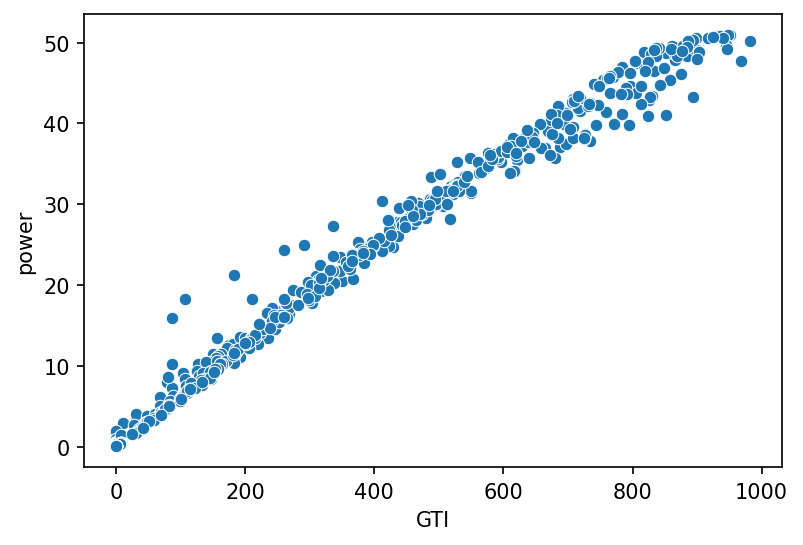

In [123]:
abnormal_pg_8 = block_1_df_Pgt.iloc[4845:5845]

pg_filtering_8 = abnormal_pg_8[((abnormal_pg_8['power']>4.5) & (abnormal_pg_8['GTI']<60)) | 
                               ((abnormal_pg_8['power']>25) & (abnormal_pg_8['GTI']<200)) |
                                                            
                               ((abnormal_pg_8['power']<1.5) & (abnormal_pg_8['GTI']>10)) |
                               ((abnormal_pg_8['power']<22) & (abnormal_pg_8['GTI']>430)) |
                               ((abnormal_pg_8['power']<12.5) & (abnormal_pg_8['GTI']>280)) ].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_8.drop(pg_filtering_8,inplace = True)
block_1_df_Pgt.drop(pg_filtering_8,inplace = True)

print(len(pg_filtering_8))


plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_8,x='GTI',y='power')

164


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='GTI', ylabel='power'>

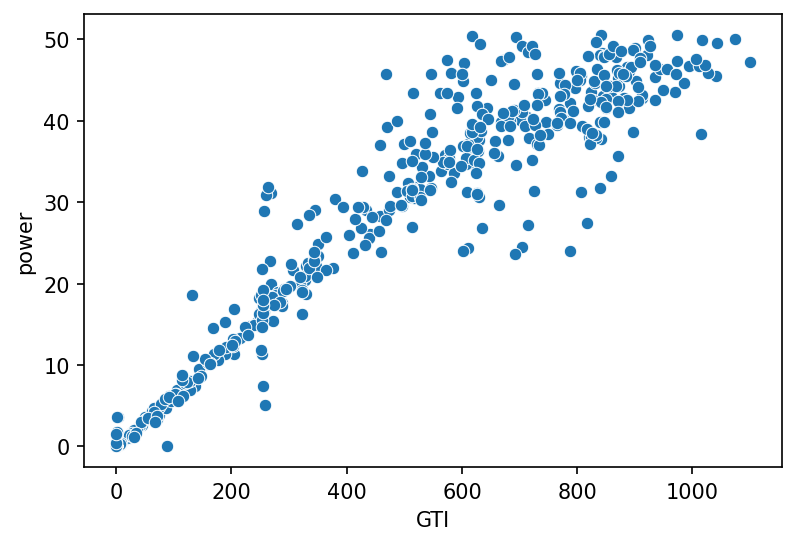

In [124]:
abnormal_pg_9 = block_1_df_Pgt.iloc[5815:6815]

pg_filtering_9 = abnormal_pg_9[((abnormal_pg_9['power']>5) & (abnormal_pg_9['GTI']<40)) | 
                               ((abnormal_pg_9['power']>25) & (abnormal_pg_9['GTI']<230)) |
                               ((abnormal_pg_9['power']>38) & (abnormal_pg_9['GTI']<380)) |
                                                            
                               ((abnormal_pg_9['power']<5) & (abnormal_pg_9['GTI']>100)) |
                               ((abnormal_pg_9['power']<13) & (abnormal_pg_9['GTI']>400)) |
                               ((abnormal_pg_9['power']<22) & (abnormal_pg_9['GTI']>410))].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_9.drop(pg_filtering_9,inplace = True)
block_1_df_Pgt.drop(pg_filtering_9,inplace = True)

print(len(pg_filtering_9))


plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_9,x='GTI',y='power')

correct value [6659:7659]

5


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='GTI', ylabel='power'>

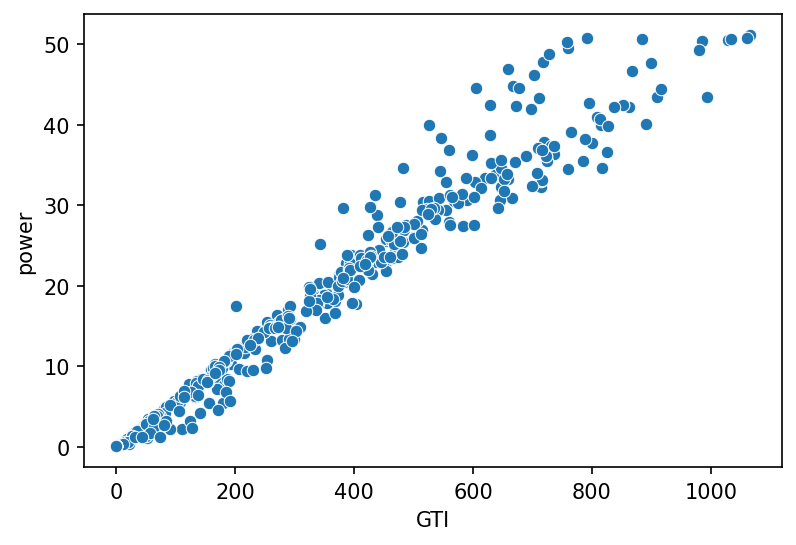

In [125]:
abnormal_pg_10 = block_1_df_Pgt.iloc[12659:13659]

pg_filtering_10 = abnormal_pg_10[((abnormal_pg_10['power']>7) & (abnormal_pg_10['GTI']<100)) | 
                                 ((abnormal_pg_10['power']>27) & (abnormal_pg_10['GTI']<320)) ].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_10.drop(pg_filtering_10,inplace = True)
block_1_df_Pgt.drop(pg_filtering_10,inplace = True)

print(len(pg_filtering_10))


plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_10,x='GTI',y='power')

correct value [13649:14649]

10


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='GTI', ylabel='power'>

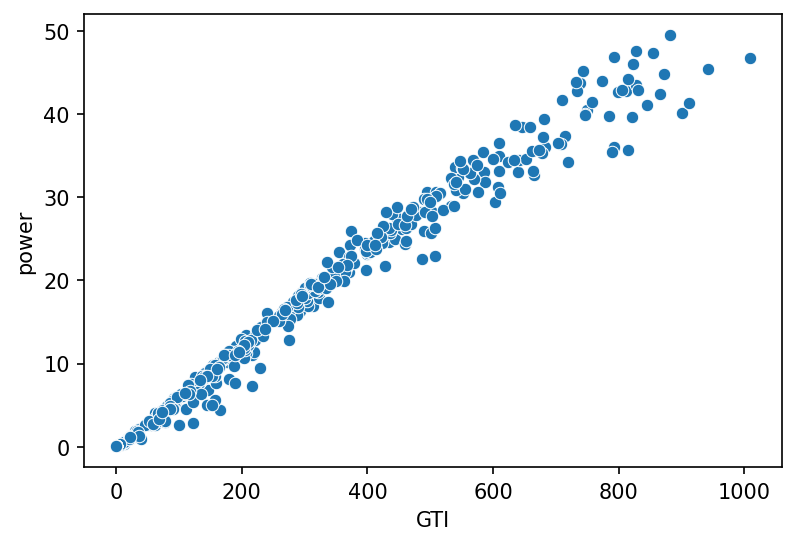

In [126]:
abnormal_pg_11 = block_1_df_Pgt.iloc[17649:18649]

pg_filtering_11 = abnormal_pg_11[((abnormal_pg_11['power']>2) & (abnormal_pg_11['GTI']<15)) | 
                               ((abnormal_pg_11['power']>32) & (abnormal_pg_11['GTI']<270)) |
                                                            
                               ((abnormal_pg_11['power']<2.5) & (abnormal_pg_11['GTI']>40)) |
                               ((abnormal_pg_11['power']<13) & (abnormal_pg_11['GTI']>400)) ].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_11.drop(pg_filtering_11,inplace = True)
block_1_df_Pgt.drop(pg_filtering_11,inplace = True)

print(len(pg_filtering_11))


plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_11,x='GTI',y='power')

393


C:\Users\Prasad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='GTI', ylabel='power'>

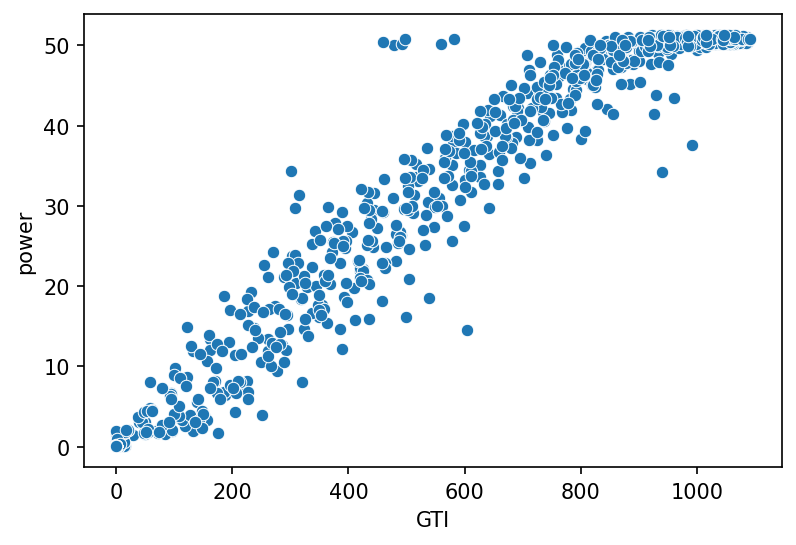

In [127]:
abnormal_pg_12 = block_1_df_Pgt.iloc[19649:21649]

pg_filtering_12 = abnormal_pg_12[((abnormal_pg_12['power']>23.5) & (abnormal_pg_12['GTI']<250)) | 
                               ((abnormal_pg_12['power']>2.5) & (abnormal_pg_12['GTI']<10)) |
                                                            
                               ((abnormal_pg_12['power']<1.5) & (abnormal_pg_12['GTI']>15)) |
                               ((abnormal_pg_12['power']<13) & (abnormal_pg_12['GTI']>440)) ].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_12.drop(pg_filtering_12,inplace = True)
block_1_df_Pgt.drop(pg_filtering_12,inplace = True)

print(len(pg_filtering_12))


plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_12,x='GTI',y='power')

# Visualising Data after cleaning 

# Power vs GTI

22577 28139


Text(0.5, 1.0, 'GTI vs Power after cleaning')

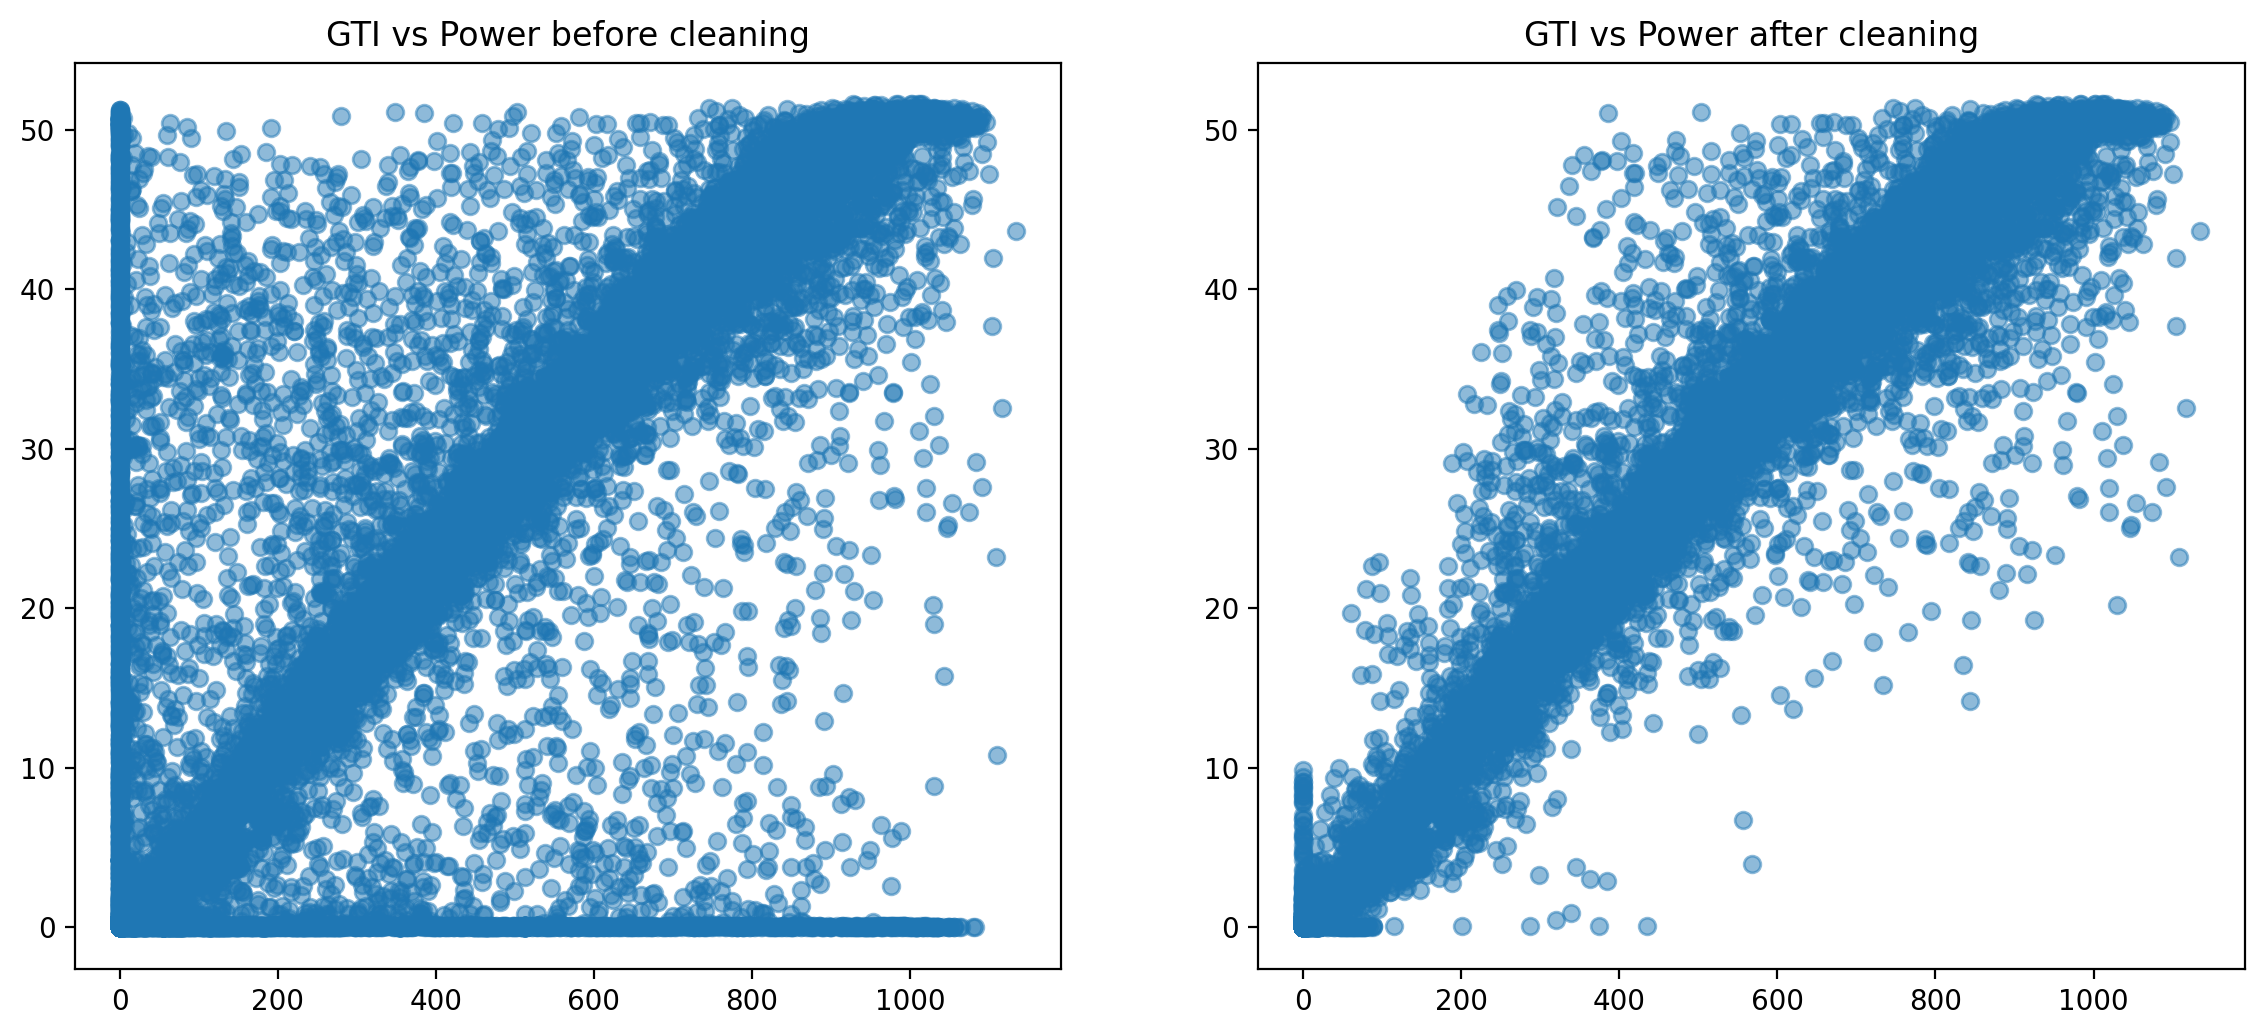

In [142]:

checking_chan_fig_2, checking_chan_axes_2 = plt.subplots(nrows=1,ncols=2,figsize=(14,6),dpi=200)
checking_chan_axes_2[0].scatter(block_1_data['GTI'],block_1_data['power'],alpha=0.5)

checking_chan_axes_2[0].set_title('Power vs GTI before cleaning')

checking_chan_axes_2[1].scatter(block_1_df_Pgt['GTI'],block_1_df_Pgt['power'],alpha=0.5)
print(len(block_1_df_Pgt),len(block_1_data))
checking_chan_axes_2[1].set_title('Power vs GTI after cleaning')



# Power vs  GHI

456


<AxesSubplot:xlabel='GHI', ylabel='power'>

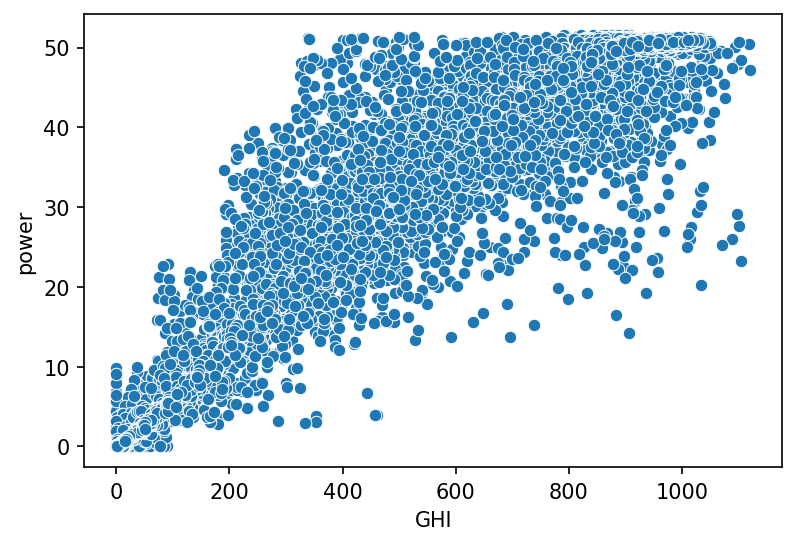

In [131]:
abnormal_pg_13 = block_1_df_Pgt.copy()

pg_filtering_13 = abnormal_pg_13[((abnormal_pg_13['power']>10) & (abnormal_pg_13['GHI']<70)) | 
                               ((abnormal_pg_13['power']>40) & (abnormal_pg_13['GHI']<310)) |
                                ((abnormal_pg_13['power']>23) & (abnormal_pg_13['GHI']<190)) |
                                                            
                               ((abnormal_pg_13['power']<2.5) & (abnormal_pg_13['GHI']>90)) |
                               ((abnormal_pg_13['power']<12) & (abnormal_pg_13['GHI']>490)) ].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_13.drop(pg_filtering_13,inplace = True)
block_1_df_Pgt.drop(pg_filtering_13,inplace = True)

print(len(pg_filtering_13))


plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_13,x='GHI',y='power')

22577 28139


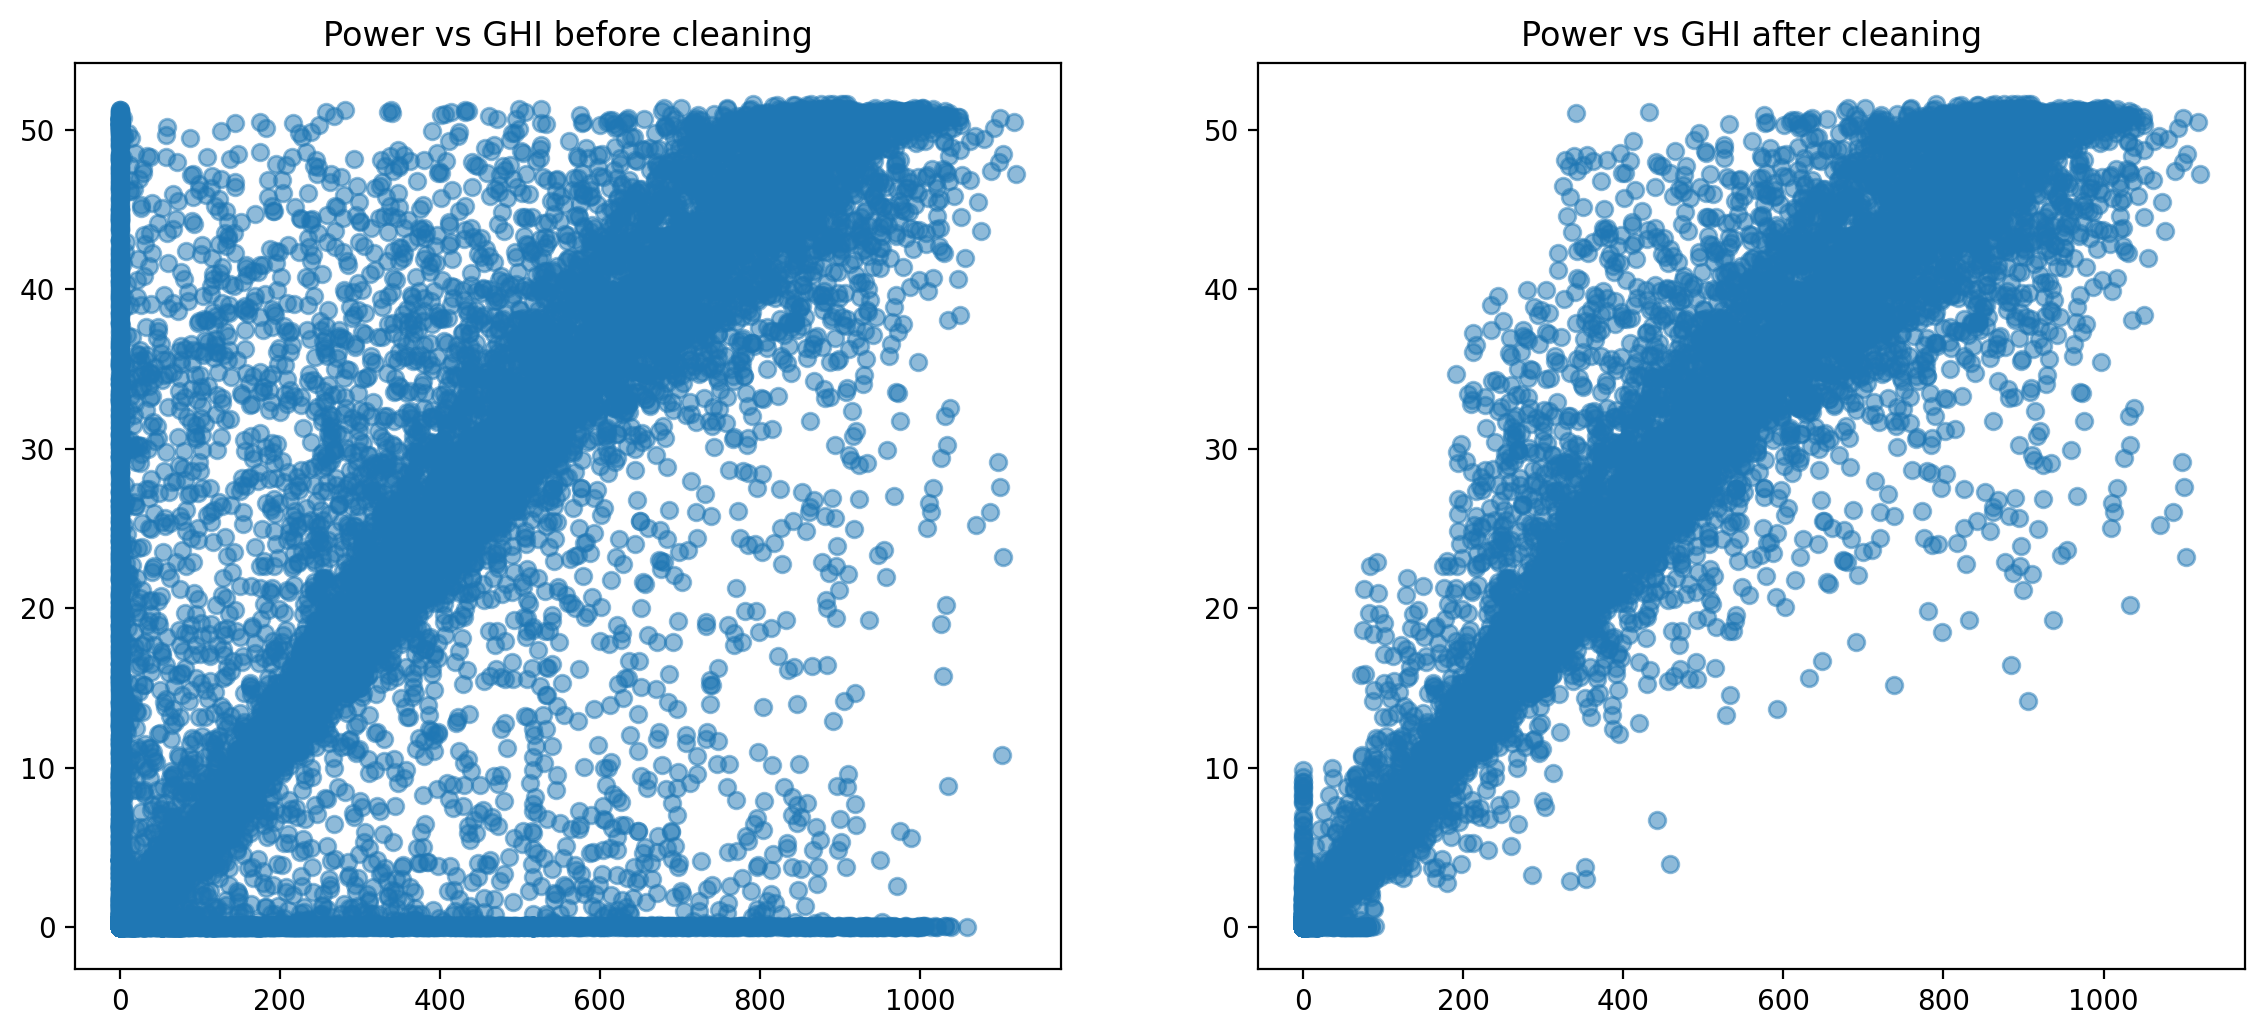

In [143]:

checking_chan_fig_3, checking_chan_axes_3 = plt.subplots(nrows=1,ncols=2,figsize=(14,6),dpi=200)
checking_chan_axes_3[0].scatter(block_1_data['GHI'],block_1_data['power'],alpha=0.5)

checking_chan_axes_3[0].set_title('Power vs GHI before cleaning')

checking_chan_axes_3[1].set_title('Power vs GHI after cleaning')
checking_chan_axes_3[1].scatter(block_1_df_Pgt['GHI'],block_1_df_Pgt['power'],alpha=0.5)
print(len(block_1_df_Pgt),len(block_1_data))



# GTI vs GHI

102


<AxesSubplot:xlabel='GHI', ylabel='GTI'>

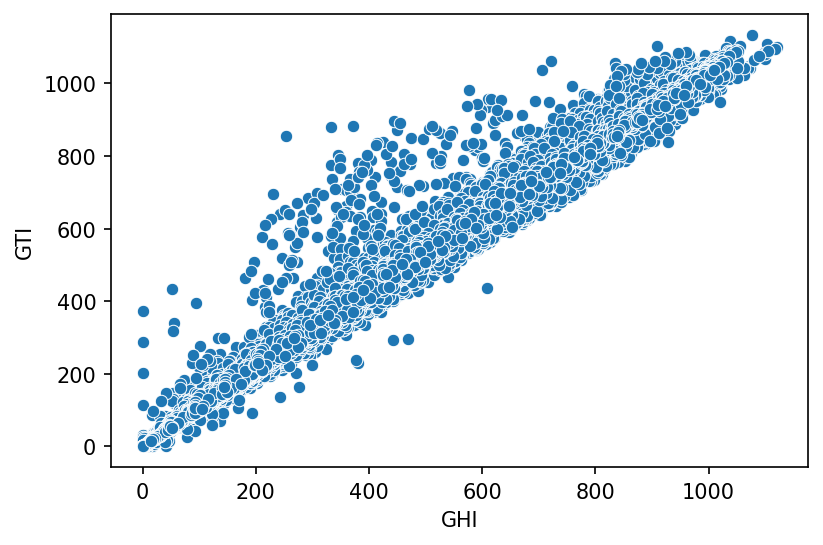

In [134]:
abnormal_pg_14 = block_1_df_Pgt.copy()

pg_filtering_14 = abnormal_pg_14[((abnormal_pg_14['GTI']>900) & (abnormal_pg_14['GHI']<550)) | 
                                                            
                               ((abnormal_pg_14['GTI']<10) & (abnormal_pg_14['GHI']>70)) |
                                 ((abnormal_pg_14['GTI']<100) & (abnormal_pg_14['GHI']>200)) |
                                 ((abnormal_pg_14['GTI']<430) & (abnormal_pg_14['GHI']>500)) |
                                 ((abnormal_pg_14['GTI']<590) & (abnormal_pg_14['GHI']>650)) |
                                 ((abnormal_pg_14['GTI']<290) & (abnormal_pg_14['GHI']>400)) |
                               ((abnormal_pg_14['GTI']<220) & (abnormal_pg_14['GHI']>280)) ].index #((abnormal_pg_1['power']>20) & (abnormal_pg_1['GTI']<190)) |

abnormal_pg_14.drop(pg_filtering_14,inplace = True)
block_1_df_Pgt.drop(pg_filtering_14,inplace = True)

print(len(pg_filtering_14))


plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=abnormal_pg_14,x='GHI',y='GTI')

  # Visualising the data block_1_df_pgt

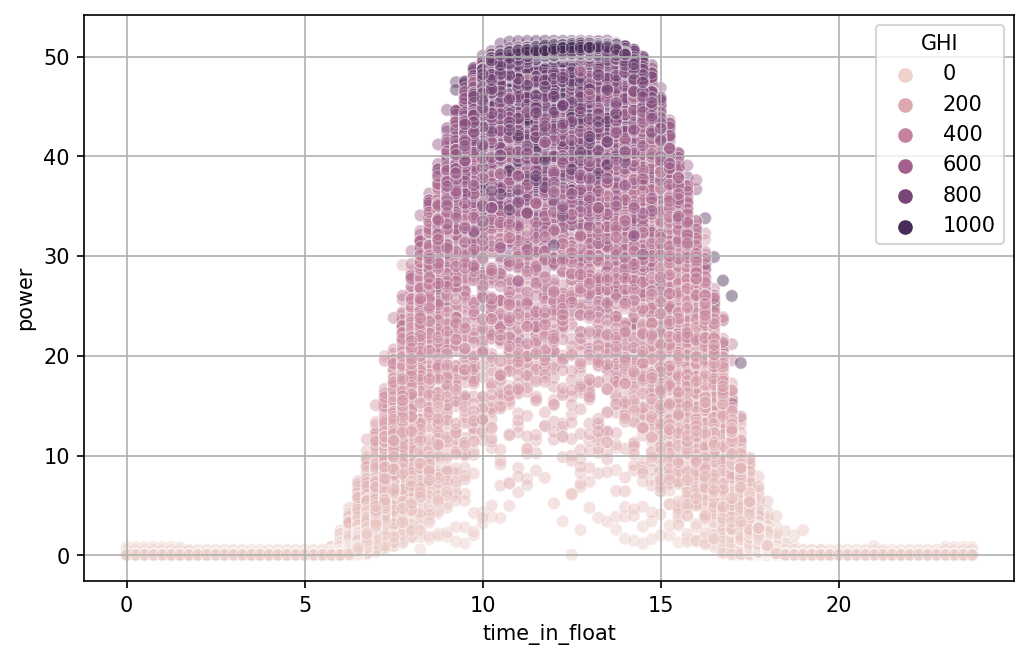

In [135]:
plt.figure(figsize=(8,5),dpi=150)
sns.scatterplot(data=block_1_df_Pgt,x='time_in_float',y='power',alpha=0.45,hue='GHI')  
plt.grid()

Text(0, 0.5, 'power')

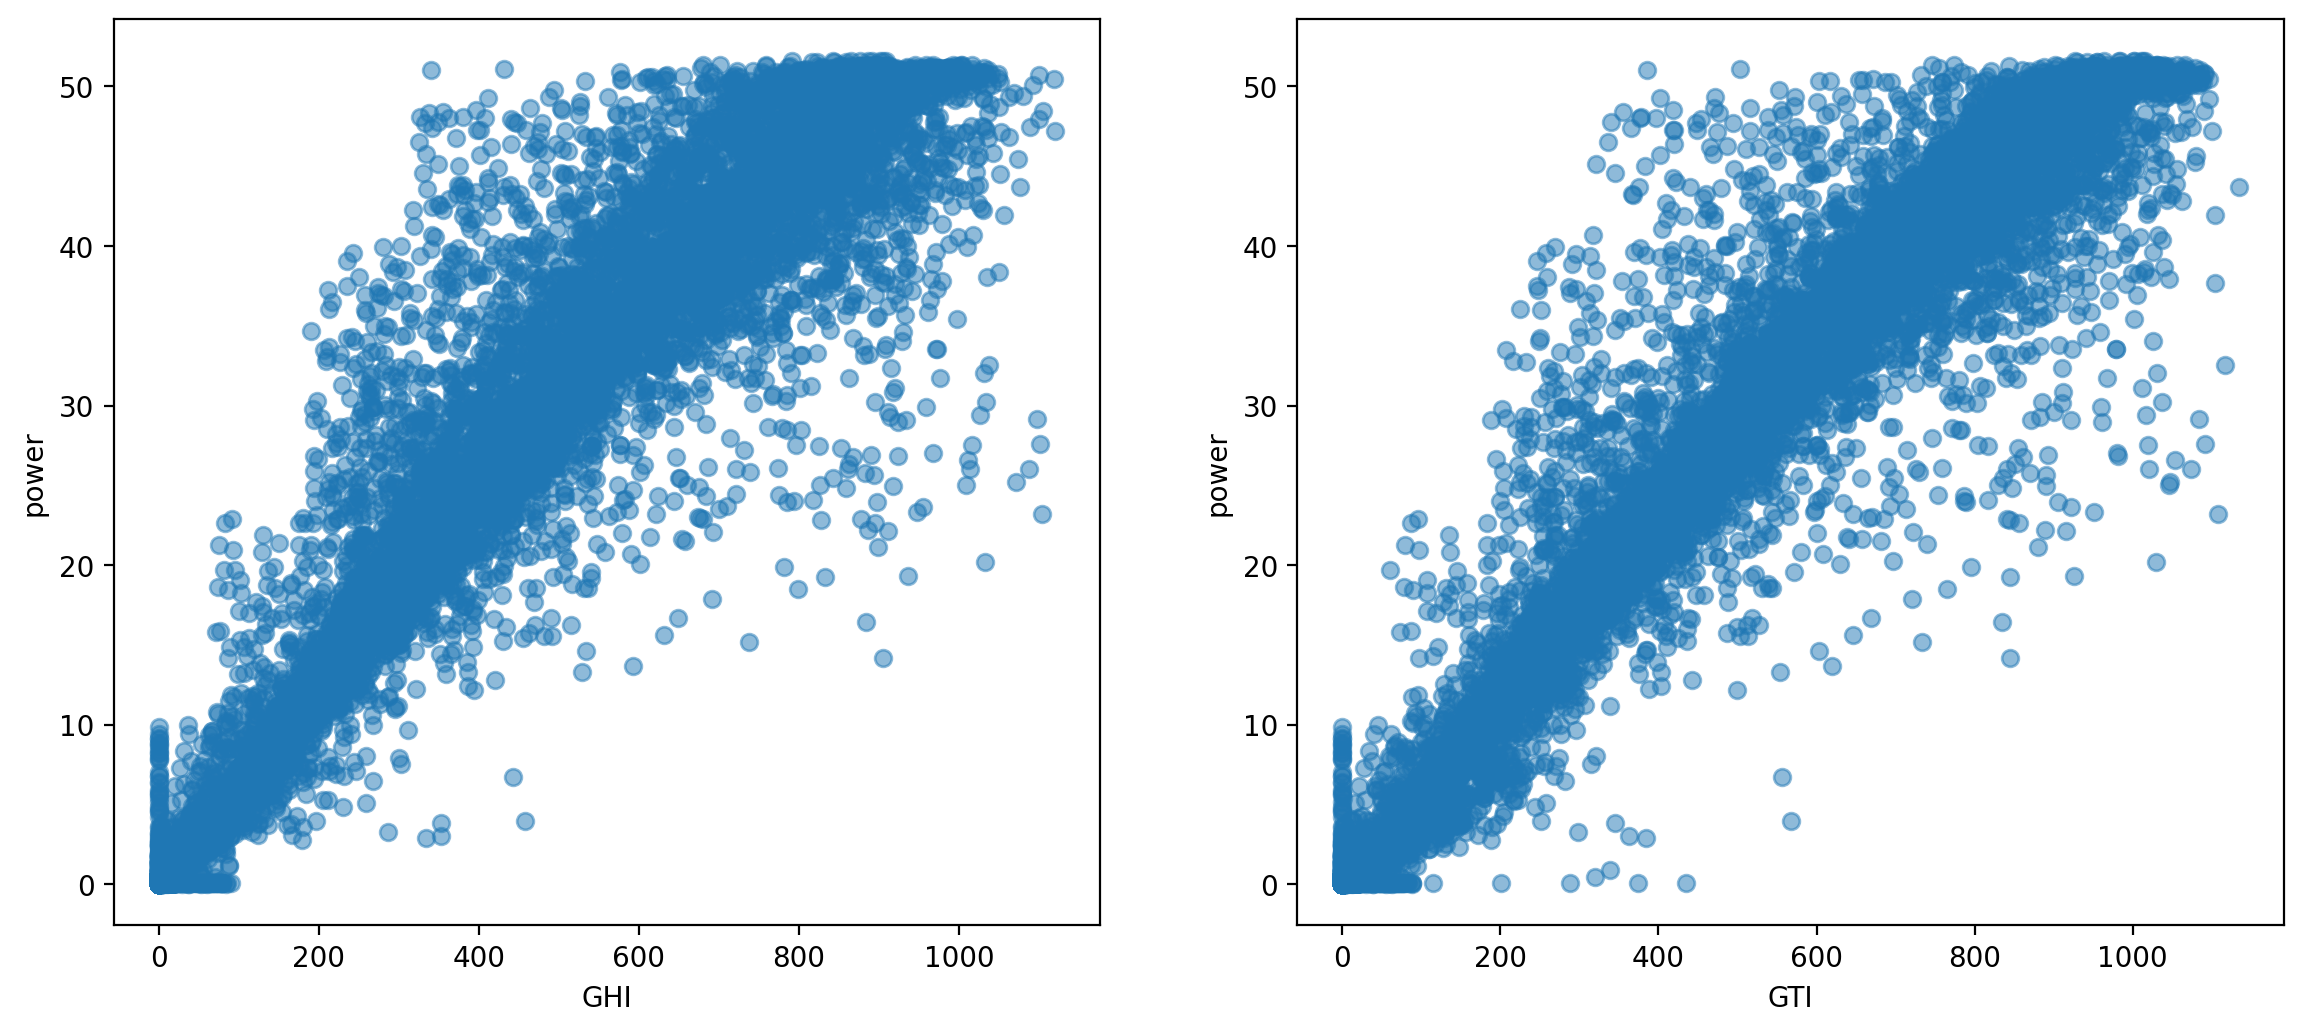

In [136]:
 

visual_1_fig, visual_1_axes = plt.subplots(nrows=1,ncols=2,figsize=(14,6),dpi=200)
visual_1_axes[0].scatter(block_1_df_Pgt['GHI'],block_1_df_Pgt['power'],alpha=0.5)
visual_1_axes[0].set_xlabel('GHI')
visual_1_axes[0].set_ylabel('power')
visual_1_axes[0].set_title('cleaned Power vs GHI')

visual_1_axes[1].scatter(block_1_df_Pgt['GTI'],block_1_df_Pgt['power'],alpha=0.5)
visual_1_axes[1].set_xlabel('GTI')
visual_1_axes[1].set_ylabel('power')
visual_1_axes[1].set_title('cleaned Power vs GTI')


# data GHI vs GTI 

Text(0.5, 1.0, 'GTI vs GHI after cleaning')

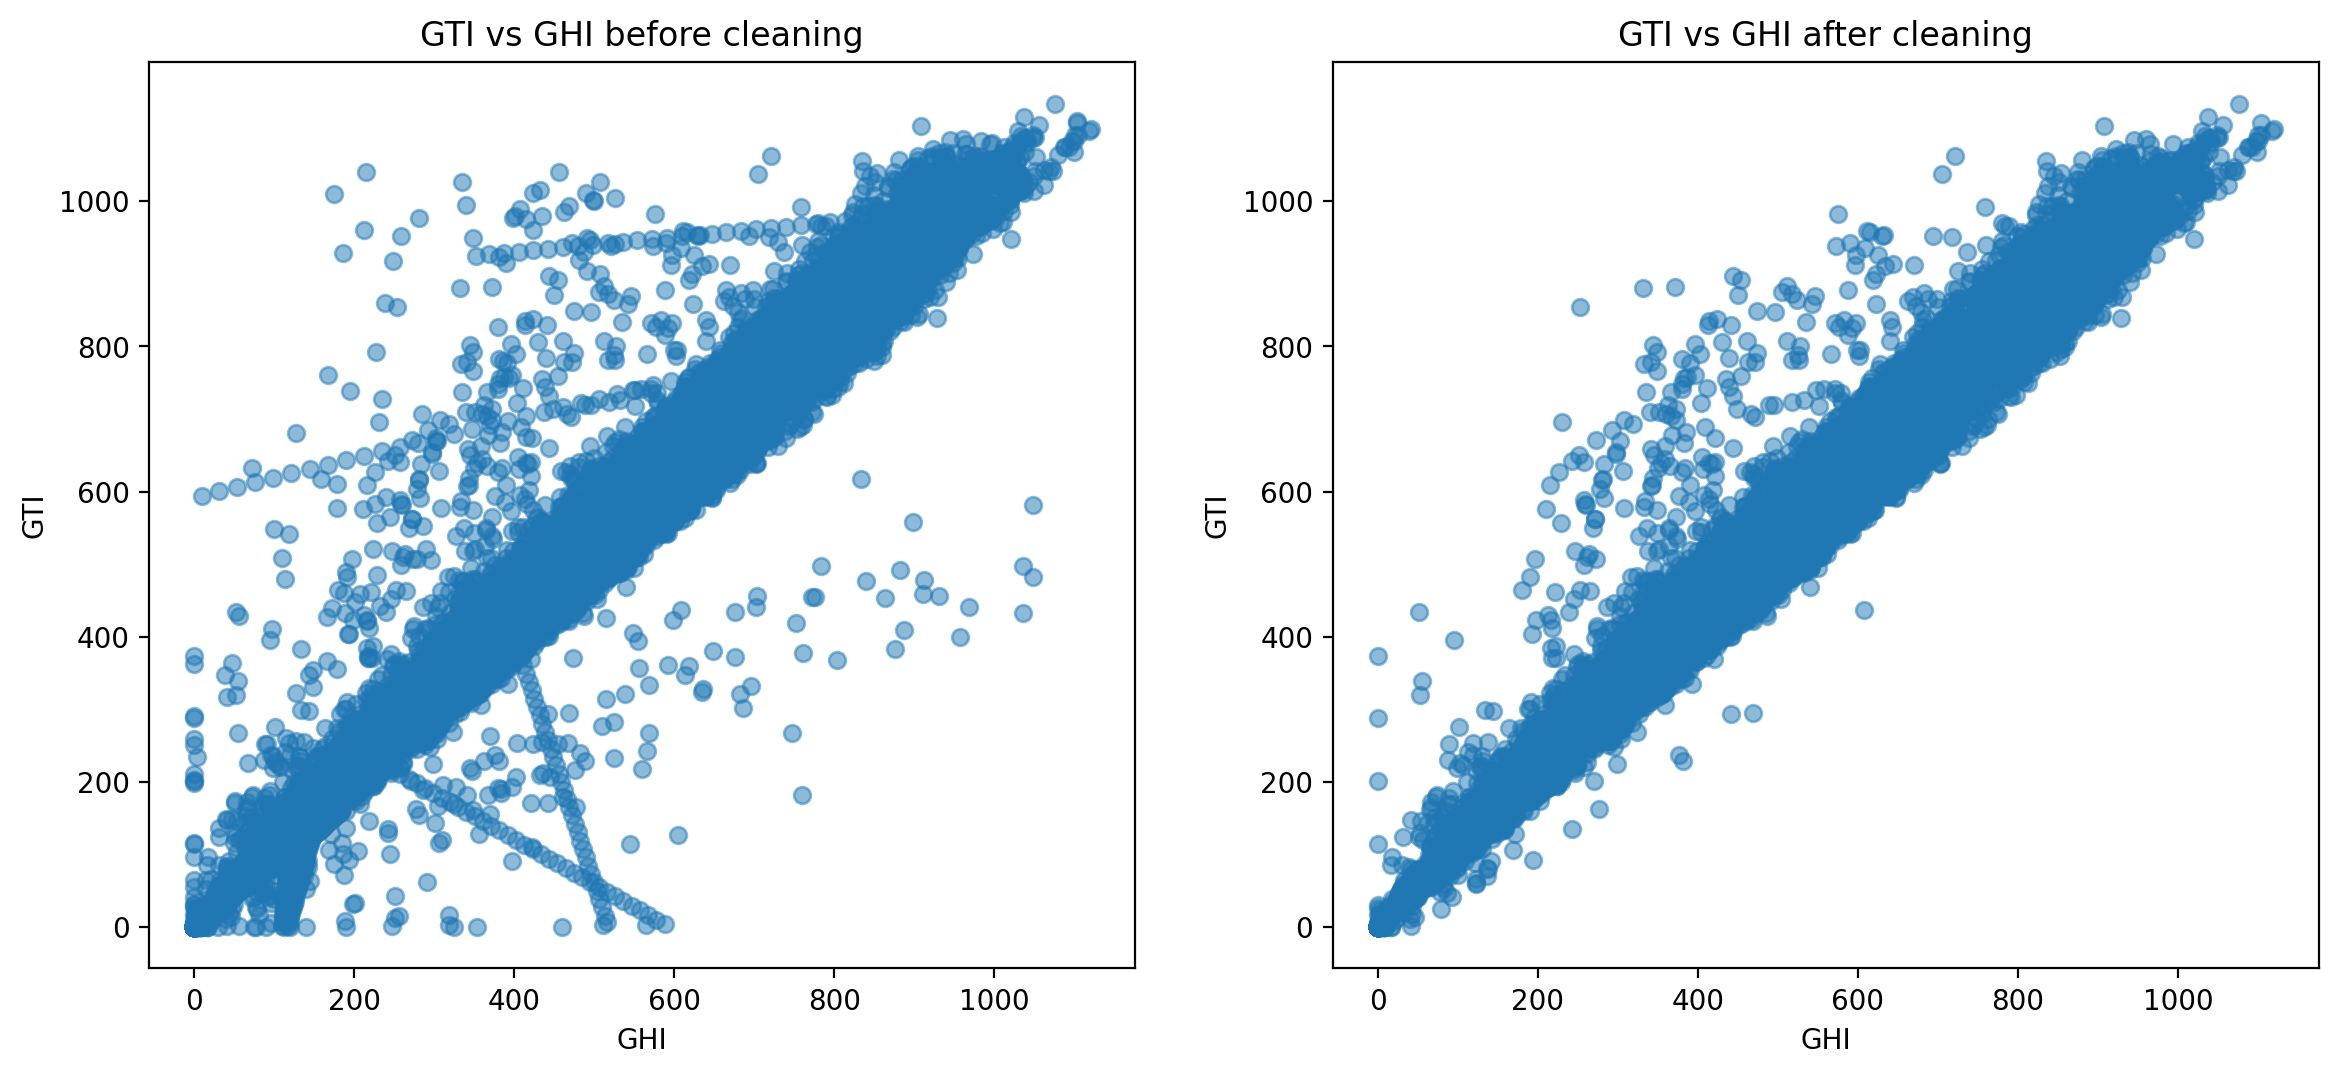

In [145]:
 

visual_2_fig, visual_2_axes = plt.subplots(nrows=1,ncols=2,figsize=(14,6),dpi=200)
visual_2_axes[0].scatter(block_1_df['GHI'],block_1_df['GTI'],alpha=0.5)
visual_2_axes[0].set_xlabel('GHI')
visual_2_axes[0].set_ylabel('GTI')
visual_2_axes[0].set_title('GTI vs GHI before cleaning')

visual_2_axes[1].scatter(block_1_df_Pgt['GHI'],block_1_df_Pgt['GTI'],alpha=0.5)
visual_2_axes[1].set_xlabel('GHI')
visual_2_axes[1].set_ylabel('GTI')
visual_2_axes[1].set_title('GTI vs GHI after cleaning')


# To export the cleaned data to excel.

In [ ]:

block_1_df_Pgt.to_excel('finally_cleaned_df.xlsx')